<a href="https://colab.research.google.com/github/adhang/data-science-digital-skola/blob/update/99.%20Final%20Project/Telco%20Customer%20Churn%20Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Telco Customer Churn Prediction
Author: Adhang Muntaha Muhammad

[![LinkedIn](https://img.shields.io/badge/linkedin-0077B5?style=for-the-badge&logo=linkedin&logoColor=white&link=https://www.linkedin.com/in/adhangmuntaha/)](https://www.linkedin.com/in/adhangmuntaha/)
[![GitHub](https://img.shields.io/badge/github-121011?style=for-the-badge&logo=github&logoColor=white&link=https://github.com/adhang)](https://github.com/adhang)
[![Kaggle](https://img.shields.io/badge/kaggle-20BEFF?style=for-the-badge&logo=kaggle&logoColor=white&link=https://www.kaggle.com/adhang)](https://www.kaggle.com/adhang)
[![Tableau](https://img.shields.io/badge/tableau-E97627?style=for-the-badge&logo=tableau&logoColor=white&link=https://public.tableau.com/app/profile/adhang)](https://public.tableau.com/app/profile/adhang)
___

**Context**
- The telco customer churn data contains customer information from a fictional telco company
- This company provides various services such as streaming, phone, and internet services
<br><br>

**Problem Background**
- Customer churn is one of the biggest problems in the telecommunications industry
- By definition, customer churn is when customers stop interacting (subscribe) with the company
- Companies need to invest (expense costs) to get new customers
- When a customer leaves the service (churns), it indicates a loss of investment
- Cost, time, and effort need to be channelled to replace customers who have left the service
- Acquiring new customers is often more difficult and more expensive than retaining existing customers
- On Hardvard Business Review [page](https://hbr.org/2014/10/the-value-of-keeping-the-right-customers), they said: acquiring a new customer is anywhere from five to 25 times more expensive than retaining an existing one
<br><br>

**Objectives**
- Predict whether customers will continue to use the service or will leave the service
- Understand the customer behaviors: what keeps customers using the service and what makes them leave the service
<br><br>

**Contents**
1. Dataset Information
2. Importing Libraries
3. Dataset Overview
4. Dataset Overview - Function
5. Exploratory Data Analysis
6. Data Preprocessing

# 1. Dataset Information
This dataset comes from Kaggle, you can find it here: [Telco Customer Churn](https://www.kaggle.com/blastchar/telco-customer-churn).
<br><br>
This dataset is used to predict behavior to retain customers. Each row represents a customer, and each column contains customer's attribute.
<br><br>
**Attribute Information**
- Identifier
  - `customerID` - ID number of the customer

- Target Variable
  - `Churn` - Churn status, whether the customer churned or not

- Demographic information
  - `gender` - Whether the customer is a male or a female
  - `SeniorCitizen` - Whether the customer is a senior citizen or not
  - `Partner` - Whether the customer has a partner or not
  - `Dependents` - Whether the customer has dependents or not

- Customer account information
  - `tenure` - Number of months the customer has used the service
  - `Contract` - The contract term of the customer
  - `PaperlessBilling` - Whether the customer has paperless billing or not
  - `PaymentMethod` - The customer’s payment method
  - `MonthlyCharges` - The amount charged to the customer monthly
  - `TotalCharges` - The total amount charged to the customer
  
- Services that each customer has signed up for
  - `PhoneService` - Whether the customer has a phone service or not
  - `MultipleLines` - Whether the customer has multiple lines or not
  - `InternetService` - Customer’s internet service provider
  - `OnlineSecurity` - Whether the customer has online security or not
  - `OnlineBackup` - Whether the customer has online backup or not
  - `DeviceProtection` - Whether the customer has device protection or not
  - `TechSupport` - Whether the customer has tech support or not
  - `StreamingTV` - Whether the customer has streaming TV or not
  - `StreamingMovies` - Whether the customer has streaming movies or not
<br><br>

**Note:** Since this dataset is using `CamelCase` format for the column names, for this project, I will convert it to `snake_case` format.

# 2. Importing Libraries

In [2]:
# !pip install --upgrade matplotlib
# !pip install --upgrade seaborn
!pip install inflection

In [3]:
# basic
import pandas as pd
import numpy as np

# viz
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns

plt.style.use('fivethirtyeight')
sns.set_style('white')
sns.set_context('notebook', font_scale=1.5, rc={'lines.linewidth':1.5})
# I change the maximum width in characters of a column (default: 50)
pd.set_option('display.max_colwidth', None)

# CamelCase to snake_case format
import inflection

# encoding
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

# scaling
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# oversampling
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN

# train test split
from sklearn.model_selection import train_test_split

# model
from sklearn.neighbors import KNeighborsClassifier

# metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from sklearn.model_selection import GridSearchCV

# 3. Dataset Overview
This is just a basic analysis, such as finding missing values, data types of each column, data variation, etc.
<br><br>
I do this analysis because it seems that this dataset contains no null values. But, actually, it has some null values (clue: on the total charge attribute).
<br><br>
If you want to skip reading this section, you can jump to the next section.

## Reading Dataset

In [ ]:
path = 'https://raw.githubusercontent.com/adhang/data-science-digital-skola/main/99.%20Final%20Project/dataset/Telco-Customer-Churn.csv'

data = pd.read_csv(path)
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Duplicate Values

In [ ]:
data.duplicated().sum()

0

This dataset doesn't have any duplicate values. It's a good sign.
<br><br>
Since the `customerID` is not essential, I will drop it.

In [ ]:
data.drop('customerID', axis=1, inplace=True)
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Renaming Column Names
Since this dataset is using `CamelCase` format for the column names, I will convert it to `snake_case` format. It's just a personal preference.

In [ ]:
# renaming the column
column_list = list(data.columns)

for i, col in enumerate(column_list):
  column_list[i] = inflection.underscore(column_list[i]).replace(' ', '_')

data.columns = column_list
data.head()

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges,churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Data Types

### General Data Type

In [ ]:
# numerical
column_list_numerical = ['tenure', 'monthly_charges', 'total_charges']

# categorical
column_list_categorical = list(data.columns)
column_list_categorical.remove('tenure')
column_list_categorical.remove('monthly_charges')
column_list_categorical.remove('total_charges')

data_type_general = dict()

for col in data.columns:
  if col in column_list_numerical:
    data_type_general[col] = 'numerical'
  else:
    data_type_general[col] = 'categorical'

tmp = pd.Series(data_type_general)
data_type_general = pd.DataFrame(tmp).T.rename({0:'general data types'})
data_type_general

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges,churn
general data types,categorical,categorical,categorical,categorical,numerical,categorical,categorical,categorical,categorical,categorical,categorical,categorical,categorical,categorical,categorical,categorical,categorical,numerical,numerical,categorical


### Python Data Type

In [ ]:
data_type_python = pd.DataFrame(data.dtypes).T.rename({0:'python data types'})
data_type_python

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges,churn
python data types,object,int64,object,object,int64,object,object,object,object,object,object,object,object,object,object,object,object,float64,object,object


From this output, we can see that the `total_charges` attribute has `object` data type. So, I will change it to numeric.
<br><br>
Before converting to numeric data type, since I had already explored this dataset, let's check the `total_charges` attribute where the `tenure` attribute is `0`.

In [ ]:
data[data['tenure'] == 0]

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges,churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


If you look at the original dataset, if the `tenure` attribute has `0` value, it will have blank value on the `total_charges` attribute. It's reasonable, since they haven't used any services, so they don't have any charges.
<br><br>
But, it's not a null value.

In [ ]:
data['total_charges'].isna().sum()

0

In [ ]:
data.loc[488, 'total_charges']

' '

It's not null, but a blank space `' '`. So, I will use `errors = coerce` parameter to set the invalid parsing (blank space) as `NaN`.

In [ ]:
data['total_charges'] = pd.to_numeric(data['total_charges'], errors='coerce')
data['total_charges'].isna().sum()

11

After converting to numeric data type, our data contains 11 `NaN` values, since some of the value is not a numeric. Then, I will replace the null value with `0`.

In [ ]:
data['total_charges'].fillna(0, inplace=True)
data['total_charges'].isna().sum()

0

In [ ]:
data['total_charges'] = data['total_charges'].astype(float)
data.dtypes

gender                object
senior_citizen         int64
partner               object
dependents            object
tenure                 int64
phone_service         object
multiple_lines        object
internet_service      object
online_security       object
online_backup         object
device_protection     object
tech_support          object
streaming_tv          object
streaming_movies      object
contract              object
paperless_billing     object
payment_method        object
monthly_charges      float64
total_charges        float64
churn                 object
dtype: object

It works. So, I will re-create the dataframe to store the data type of each column.

In [ ]:
data_type_python = pd.DataFrame(data.dtypes).T.rename({0:'python data types'})
data_type_python

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges,churn
python data types,object,int64,object,object,int64,object,object,object,object,object,object,object,object,object,object,object,object,float64,float64,object


## Total Data

In [ ]:
data_count = pd.DataFrame(data.count()).T.rename({0:'total data'})
data_count

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges,churn
total data,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043


## Null Values

### Total Null Values

In [ ]:
data_null_total = pd.DataFrame(data.isna().sum()).T.rename({0:'total null'})
data_null_total

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges,churn
total null,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Null Values Percentage

In [ ]:
data_null_percentage = pd.DataFrame(100*data.isna().sum()/data.shape[0]).T.rename({0:'percentage null'})
data_null_percentage

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges,churn
percentage null,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Data Variation
I will find out the data variation:
- The range of data, for numerical data
- The category variations, for categorical data

### Numerical Data
This dataset only contains 3 numerical data: `tenure`, `monthly_charges` and `total_charges`.

In [ ]:
data[column_list_numerical].min()

tenure              0.00
monthly_charges    18.25
total_charges       0.00
dtype: float64

In [ ]:
data[column_list_numerical].max()

tenure               72.00
monthly_charges     118.75
total_charges      8684.80
dtype: float64

In [ ]:
variation_numerical = dict()

for col in column_list_numerical:
  tmp = f'{data[col].min()} - {data[col].max()}'
  variation_numerical[col] = tmp

tmp = pd.Series(variation_numerical)
data_variation_numerical = pd.DataFrame(tmp).T.rename({0:'data variation'})
data_variation_numerical

,tenure,monthly_charges,total_charges
data variation,0 - 72,18.25 - 118.75,0.0 - 8684.8


### Categorical Data

In [ ]:
variation_categorical = dict()

for col in column_list_categorical:
  tmp = data[col].unique().tolist()
  tmp.sort()
  variation_categorical[col] = ', '.join(str(item) for item in tmp)

tmp = pd.Series(variation_categorical)
data_variation_categorical = pd.DataFrame(tmp).T.rename({0:'data variation'})
data_variation_categorical

,gender,senior_citizen,partner,dependents,phone_service,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,churn
data variation,"Female, Male","0, 1","No, Yes","No, Yes","No, Yes","No, No phone service, Yes","DSL, Fiber optic, No","No, No internet service, Yes","No, No internet service, Yes","No, No internet service, Yes","No, No internet service, Yes","No, No internet service, Yes","No, No internet service, Yes","Month-to-month, One year, Two year","No, Yes","Bank transfer (automatic), Credit card (automatic), Electronic check, Mailed check","No, Yes"


### Overall Data Variation

In [ ]:
data_variation = pd.concat([data_variation_numerical, data_variation_categorical], axis=1)
# data_variation = data_variation.reindex(data.columns, axis=1)
data_variation

,tenure,monthly_charges,total_charges,gender,senior_citizen,partner,dependents,phone_service,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,churn
data variation,0 - 72,18.25 - 118.75,0.0 - 8684.8,"Female, Male","0, 1","No, Yes","No, Yes","No, Yes","No, No phone service, Yes","DSL, Fiber optic, No","No, No internet service, Yes","No, No internet service, Yes","No, No internet service, Yes","No, No internet service, Yes","No, No internet service, Yes","No, No internet service, Yes","Month-to-month, One year, Two year","No, Yes","Bank transfer (automatic), Credit card (automatic), Electronic check, Mailed check","No, Yes"


In [ ]:
pd.concat([data_variation_numerical.rename({'data variation':'range'}), data_variation_categorical.rename({'data variation':'variation'})], axis=0).fillna('-').reindex(data.columns, axis=1).T

,range,variation
gender,-,"Female, Male"
senior_citizen,-,"0, 1"
partner,-,"No, Yes"
dependents,-,"No, Yes"
tenure,0 - 72,-
phone_service,-,"No, Yes"
multiple_lines,-,"No, No phone service, Yes"
internet_service,-,"DSL, Fiber optic, No"
online_security,-,"No, No internet service, Yes"
online_backup,-,"No, No internet service, Yes"


## Data Info

In [ ]:
data_info = pd.concat([data_type_general, data_type_python,
                       data_count, data_null_total,
                       data_null_percentage.round(2), data_variation],
                      axis=0)

data_info = data_info.reindex(data.columns, axis=1)
data_info

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges,churn
general data types,categorical,categorical,categorical,categorical,numerical,categorical,categorical,categorical,categorical,categorical,categorical,categorical,categorical,categorical,categorical,categorical,categorical,numerical,numerical,categorical
python data types,object,int64,object,object,int64,object,object,object,object,object,object,object,object,object,object,object,object,float64,float64,object
total data,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
total null,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
percentage null,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
data variation,"Female, Male","0, 1","No, Yes","No, Yes",0 - 72,"No, Yes","No, No phone service, Yes","DSL, Fiber optic, No","No, No internet service, Yes","No, No internet service, Yes","No, No internet service, Yes","No, No internet service, Yes","No, No internet service, Yes","No, No internet service, Yes","Month-to-month, One year, Two year","No, Yes","Bank transfer (automatic), Credit card (automatic), Electronic check, Mailed check",18.25 - 118.75,0.0 - 8684.8,"No, Yes"


It's similar to the `info()` method, but in a different representation.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             7043 non-null   object 
 1   senior_citizen     7043 non-null   int64  
 2   partner            7043 non-null   object 
 3   dependents         7043 non-null   object 
 4   tenure             7043 non-null   int64  
 5   phone_service      7043 non-null   object 
 6   multiple_lines     7043 non-null   object 
 7   internet_service   7043 non-null   object 
 8   online_security    7043 non-null   object 
 9   online_backup      7043 non-null   object 
 10  device_protection  7043 non-null   object 
 11  tech_support       7043 non-null   object 
 12  streaming_tv       7043 non-null   object 
 13  streaming_movies   7043 non-null   object 
 14  contract           7043 non-null   object 
 15  paperless_billing  7043 non-null   object 
 16  payment_method     7043 

# 4. Dataset Overview - Function

In [4]:
#@title Just Run This Function

def get_camel_case(data):
  # renaming column
  column_list = list(data.columns)

  for i, col in enumerate(column_list):
    column_list[i] = inflection.underscore(column_list[i]).replace(' ', '_')

  return column_list

def get_data_type(data, column_list_numerical):
  # general data type
  data_type_general = dict()

  for col in data.columns:
    if col in column_list_numerical:
      data_type_general[col] = 'numerical'
    else:
      data_type_general[col] = 'categorical'

  tmp = pd.Series(data_type_general)
  data_type_general = pd.DataFrame(tmp).T.rename({0:'general data types'})
  
  # pythonic data type
  data['total_charges'] = pd.to_numeric(data['total_charges'], errors='coerce')
  data['total_charges'].fillna(0, inplace=True)
  data['total_charges'] = data['total_charges'].astype(float)

  data_type_python = pd.DataFrame(data.dtypes).T.rename({0:'python data types'})

  return data_type_general, data_type_python

def get_data_variation(data, column_list_numerical, column_list_categorical):
  # numerical data variation
  variation_numerical = dict()

  for col in column_list_numerical:
    tmp = f'{data[col].min()} - {data[col].max()}'
    variation_numerical[col] = tmp

  tmp = pd.Series(variation_numerical)
  data_variation_numerical = pd.DataFrame(tmp).T.rename({0:'data variation'})

  # categorical data variation
  variation_categorical = dict()

  for col in column_list_categorical:
    tmp = data[col].unique().tolist()
    tmp.sort()
    variation_categorical[col] = ', '.join(str(item) for item in tmp)

  tmp = pd.Series(variation_categorical)
  data_variation_categorical = pd.DataFrame(tmp).T.rename({0:'data variation'})

  # overall data variation
  data_variation = pd.concat([data_variation_numerical, data_variation_categorical], axis=1)

  return data_variation

def get_dataset_overview(data):
  # renaming column
  column_list = get_camel_case(data)
  data.columns = column_list

  # total duplicated values
  # print('Total duplicated values:', data.duplicated().sum())

  # dropping column 
  data.drop('customer_id', axis=1, inplace=True)

  # column list
  column_list_numerical = ['tenure', 'monthly_charges', 'total_charges']
  column_list_categorical = list(data.columns)
  column_list_categorical.remove('tenure')
  column_list_categorical.remove('monthly_charges')
  column_list_categorical.remove('total_charges')

  # data type
  data_type_general, data_type_python = get_data_type(data, column_list_numerical)

  # total data
  data_count = pd.DataFrame(data.count()).T.rename({0:'total data'})

  # total null values
  data_null_total = pd.DataFrame(data.isna().sum()).T.rename({0:'total null'})

  # percentage of null values
  data_null_percentage = pd.DataFrame(100*data.isna().sum()/data.shape[0]).T.rename({0:'percentage null'})

  # data variation
  data_variation = get_data_variation(data, column_list_numerical, column_list_categorical)

  data_info = pd.concat([data_type_general, data_type_python,
                       data_count, data_null_total,
                       data_null_percentage.round(2), data_variation],
                      axis=0)

  data_info = data_info.reindex(data.columns, axis=1)

  return data, data_info

In [6]:
#@title And Then Run This
path = 'https://raw.githubusercontent.com/adhang/data-science-digital-skola/main/99.%20Final%20Project/dataset/Telco-Customer-Churn.csv'

data = pd.read_csv(path)
data, data_info = get_dataset_overview(data)

In [7]:
data.head()

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges,churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [8]:
data_info

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges,churn
general data types,categorical,categorical,categorical,categorical,numerical,categorical,categorical,categorical,categorical,categorical,categorical,categorical,categorical,categorical,categorical,categorical,categorical,numerical,numerical,categorical
python data types,object,int64,object,object,int64,object,object,object,object,object,object,object,object,object,object,object,object,float64,float64,object
total data,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
total null,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
percentage null,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
data variation,"Female, Male","0, 1","No, Yes","No, Yes",0 - 72,"No, Yes","No, No phone service, Yes","DSL, Fiber optic, No","No, No internet service, Yes","No, No internet service, Yes","No, No internet service, Yes","No, No internet service, Yes","No, No internet service, Yes","No, No internet service, Yes","Month-to-month, One year, Two year","No, Yes","Bank transfer (automatic), Credit card (automatic), Electronic check, Mailed check",18.25 - 118.75,0.0 - 8684.8,"No, Yes"


# 5. Exploratory Data Analysis

## Summary Statistics

In [ ]:
column_numerical = ['tenure', 'monthly_charges', 'total_charges']

data[column_numerical].describe()

,tenure,monthly_charges,total_charges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2279.734304
std,24.559481,30.090047,2266.794470
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,398.550000
50%,29.000000,70.350000,1394.550000
75%,55.000000,89.850000,3786.600000
max,72.000000,118.750000,8684.800000


## Categorical Data Distribution

### Count Plot Function
I create this function for later use.

In [ ]:
def count_plot(data, x, ax, hue=None):
  sns.countplot(data=data, x=x, hue=hue, ax=ax)
  
  if hue != None:
    ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), title=hue)
  
  # ax.set_title(x.replace("_", " "))
  ax.set_title(x)
  ax.set_xlabel('')  
  # ax.set_ylabel('')
  sns.despine()

### Stacked Bar Function

In [ ]:
def stacked_bar_plot(data, x, y, ax):
  crosstab = pd.crosstab(index=data[x], columns=data[y], normalize='index')

  crosstab.plot(kind='bar', stacked=True, ax=ax)

  # ax.set_title(x.replace("_", " "))
  ax.set_title(x)
  ax.set_xlabel('')
  ax.set_ylabel('proportion')
  ax.set_yticks(np.linspace(0,1,11))

  ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), title=y) # 1 = x-right, 0.5 = y-center

  for n, x in enumerate(crosstab.index):
    for (proportion, y_loc) in zip(crosstab.loc[x], crosstab.loc[x].cumsum()):
      ax.text(x=n,
              y=(y_loc - proportion) + (proportion / 2),
              s=f'{np.round(proportion * 100, 1)}%',
              color='white',
              fontsize=14,
              fontweight='bold',
              horizontalalignment='center',
              verticalalignment='center')
  
  sns.despine()

### Target Distribution

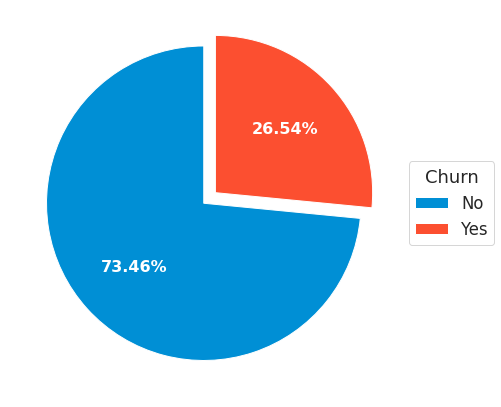

In [ ]:
pie_data = data['churn'].value_counts(normalize=True).values * 100
pie_label = data['churn'].value_counts(normalize=True).index

fig, ax = plt.subplots(figsize=(8,6))
wedges, texts, autotexts = ax.pie(pie_data,
                                  startangle=90, explode=[0, 0.1],
                                  autopct='%.2f%%', textprops={'color':'w', 'fontsize':16, 'weight':'bold'})

ax.legend(wedges, pie_label,
          title='Churn',
          loc='center left', bbox_to_anchor=(1, 0.5))


plt.tight_layout()
plt.show()

From this plot, we can see that most of the customers didn't churn. It means the target distribution is imbalanced.
<br><br>
Almost 75% of customers didn't churn. It's really not balanced. I will handle it later using oversampling method (such as SMOTE or ADASYN)

### Customer Demographic Data

#### Count

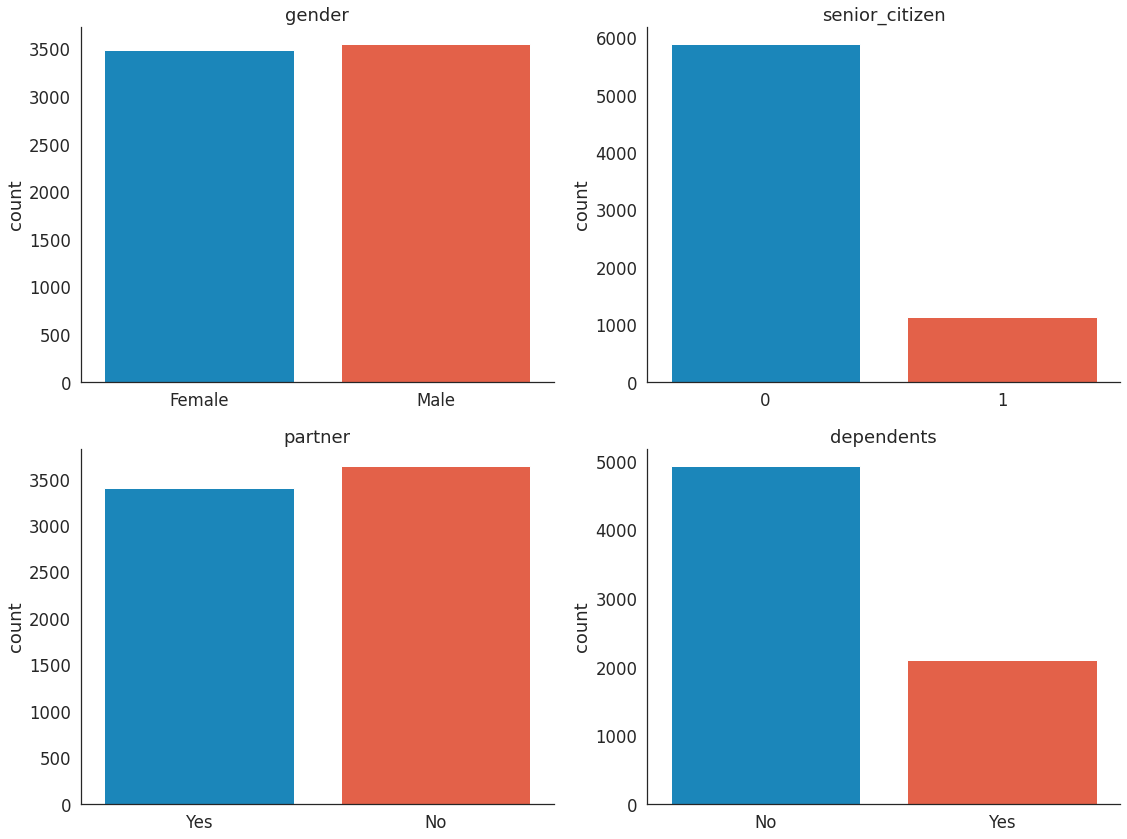

In [ ]:
column_demographic = ['gender','senior_citizen','partner','dependents']

fig, ax = plt.subplots(2, 2, figsize=(16,12))
axes_list = [axes for axes_row in ax for axes in axes_row]

for i, col in enumerate(column_demographic):
  count_plot(data, col, axes_list[i])

plt.tight_layout()
plt.show()

From this plot, we can see that
- The total female and male customers are almost the same
- Most customer is not senior citizen
- The distribution of the `partner` attribute is almost the same
- Most customer doesn't have dependents

#### Count by Churn

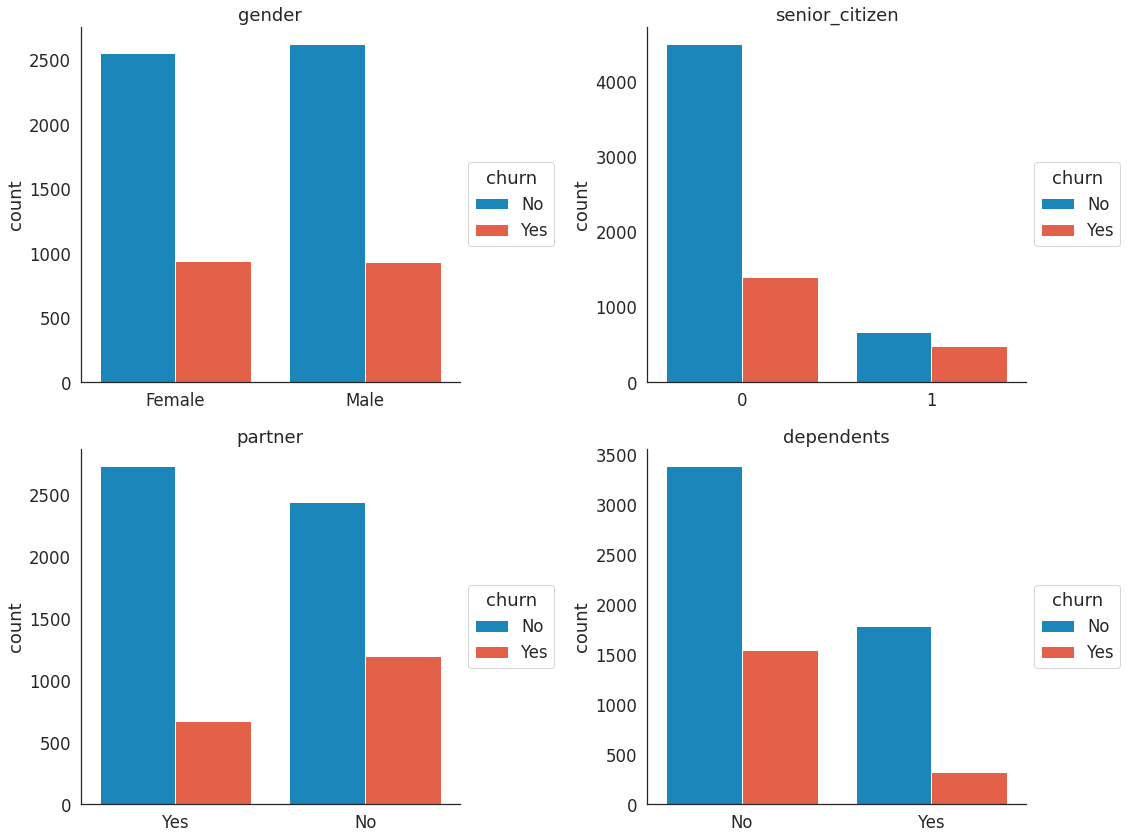

In [ ]:
column_demographic = ['gender','senior_citizen','partner','dependents']

fig, ax = plt.subplots(2, 2, figsize=(16,12))
axes_list = [axes for axes_row in ax for axes in axes_row]

for i, col in enumerate(column_demographic):
  count_plot(data, col, axes_list[i], hue='churn')

plt.tight_layout()
plt.show()

From this plot, we can see that
- The ratio of male-female customers is almost the same on both churns and not churn. Therefore, I assume that gender does not affect whether a customer will churn or not.
- Since the distribution is not balanced, we can't really see the impact of the `senior_citizen` attribute. On the next chart, I will show the proportion using stacked bar chart.
- Since the distribution of the `partner` attribute is almost the same, from this plot, I can say that the customer who has no partner has a higher probability to churn than the customer who has partner.

#### Probability Mass Function

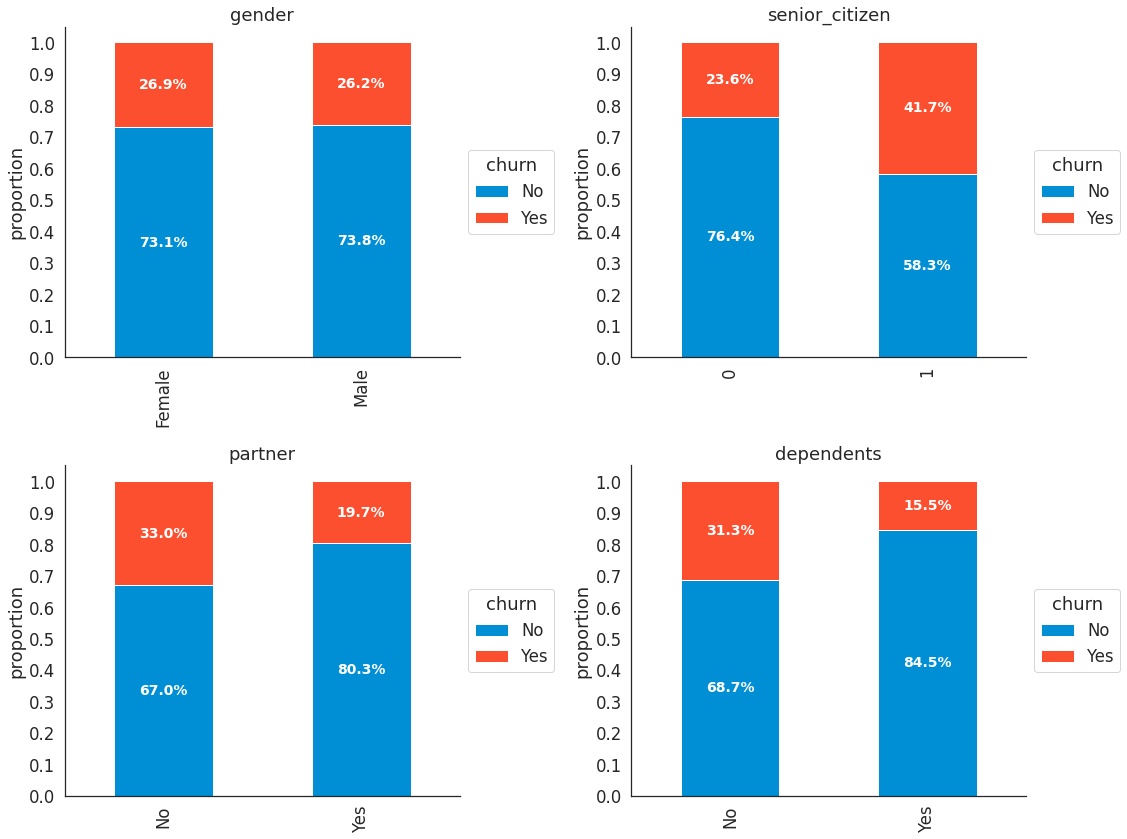

In [ ]:
column_demographic = ['gender','senior_citizen','partner','dependents']

fig, ax = plt.subplots(2, 2, figsize=(16,12))
axes_list = [axes for axes_row in ax for axes in axes_row]

for i, col in enumerate(column_demographic):
  stacked_bar_plot(data, col, 'churn', axes_list[i])

plt.tight_layout()
plt.show()

From this plot, we can say that
- The gender of the customer has the same probability of quitting or staying
- The customer who is not a senior citizen is most likely not going to churn (the probability is only about 24%). On the other side, the customer who is a senior citizen has more than 40% probability to churn.
- The customer who has no partner has more than 30% chance to churn.

### Customer Account Data

#### Count

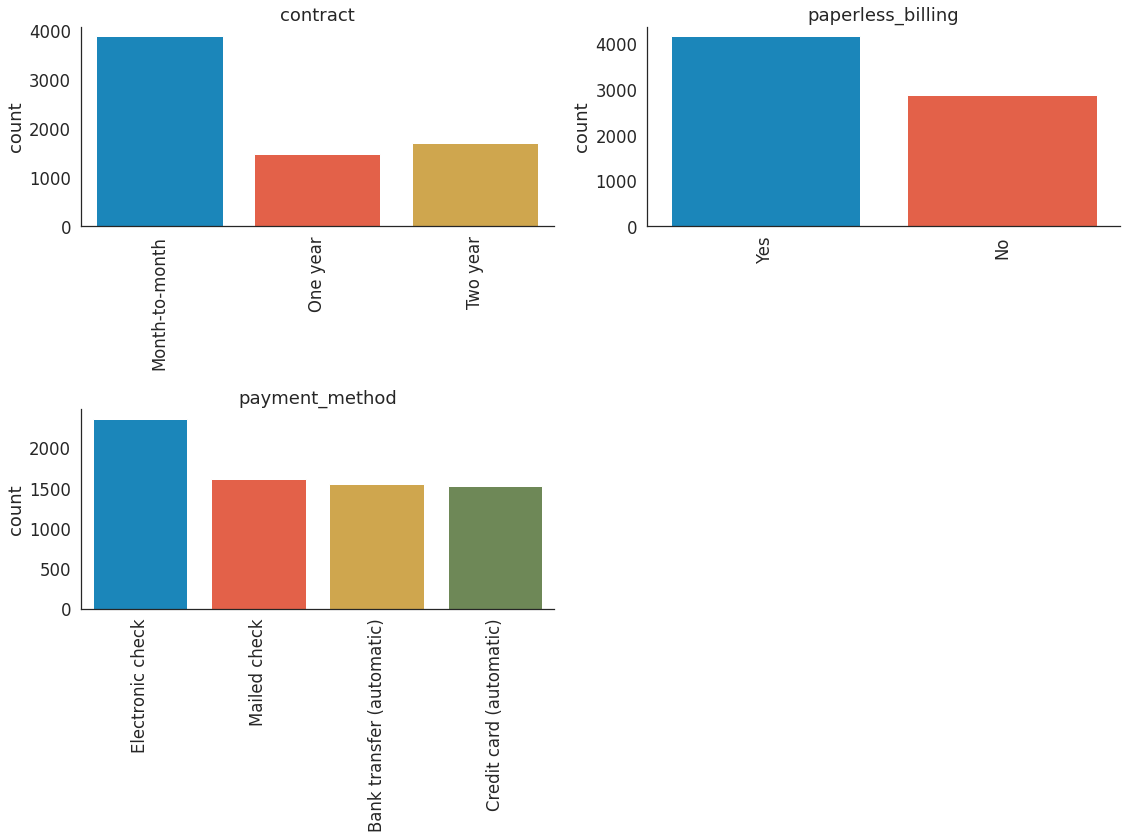

In [ ]:
column_account = ['contract','paperless_billing','payment_method']

fig, ax = plt.subplots(2, 2, figsize=(16,12))
axes_list = [axes for axes_row in ax for axes in axes_row]

for i, col in enumerate(column_account):
  count_plot(data, col, axes_list[i])
  plt.setp(axes_list[i].get_xticklabels(), rotation=90)

axes_list[-1].set_visible(False)
plt.tight_layout()
plt.show()

#### Count by Churn

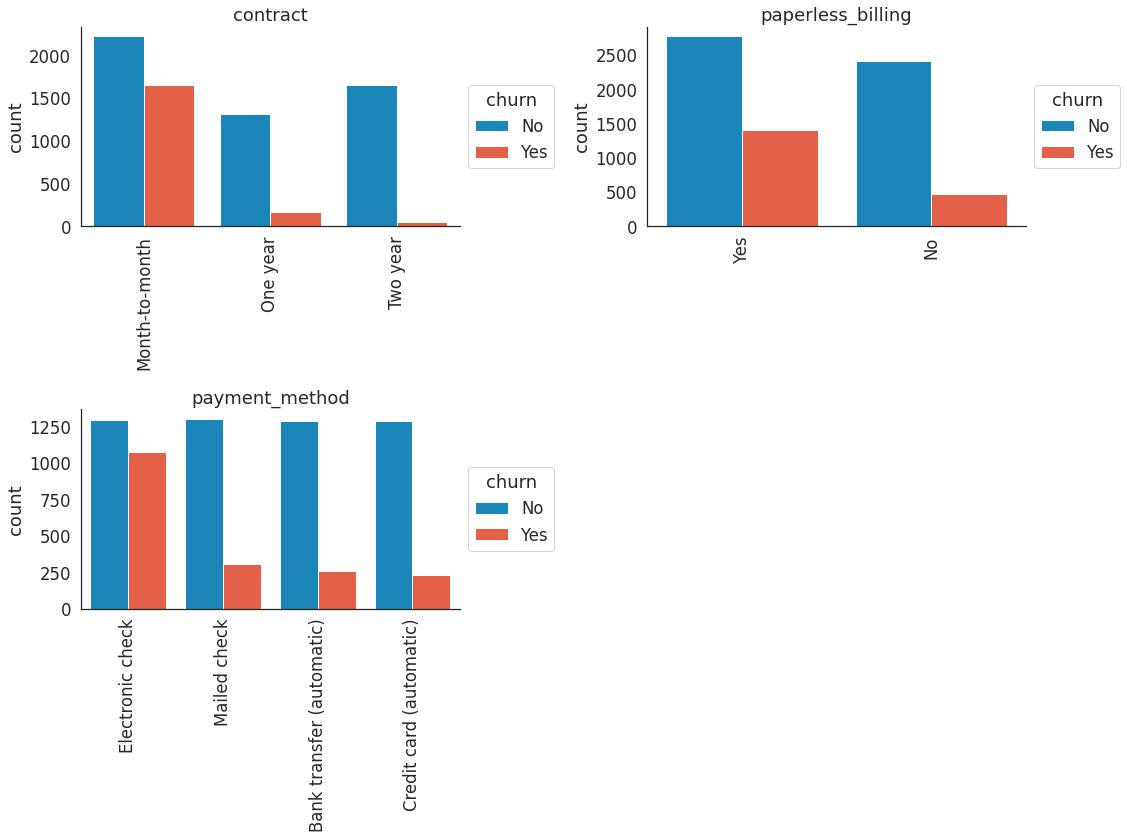

In [ ]:
column_account = ['contract','paperless_billing','payment_method']

fig, ax = plt.subplots(2, 2, figsize=(16,12))
axes_list = [axes for axes_row in ax for axes in axes_row]

for i, col in enumerate(column_account):
  count_plot(data, col, axes_list[i], hue='churn')
  plt.setp(axes_list[i].get_xticklabels(), rotation=90)

axes_list[-1].set_visible(False)
plt.tight_layout()
plt.show()

#### Probability Mass Function

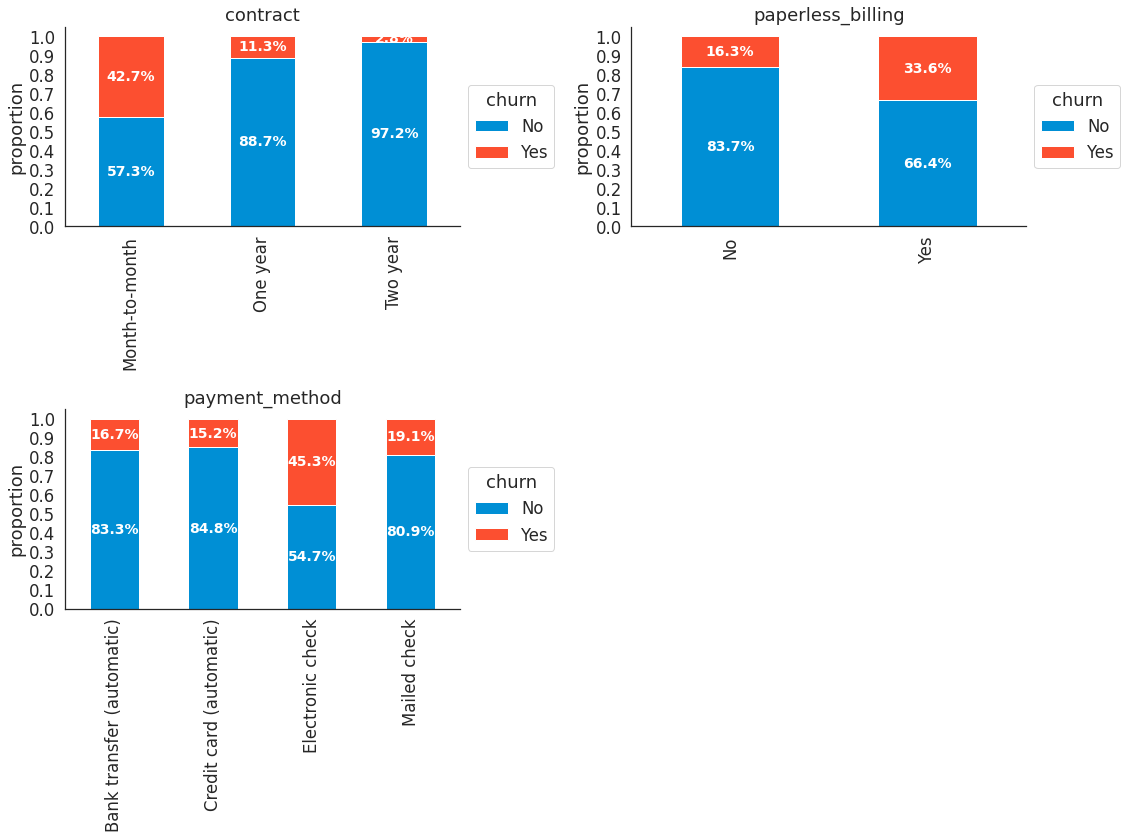

In [ ]:
column_account = ['contract','paperless_billing','payment_method']

fig, ax = plt.subplots(2, 2, figsize=(16,12))
axes_list = [axes for axes_row in ax for axes in axes_row]

for i, col in enumerate(column_account):
    stacked_bar_plot(data, col, 'churn', axes_list[i])

axes_list[-1].set_visible(False)
plt.tight_layout()
plt.show()

### Subscribed Service Data

#### Count

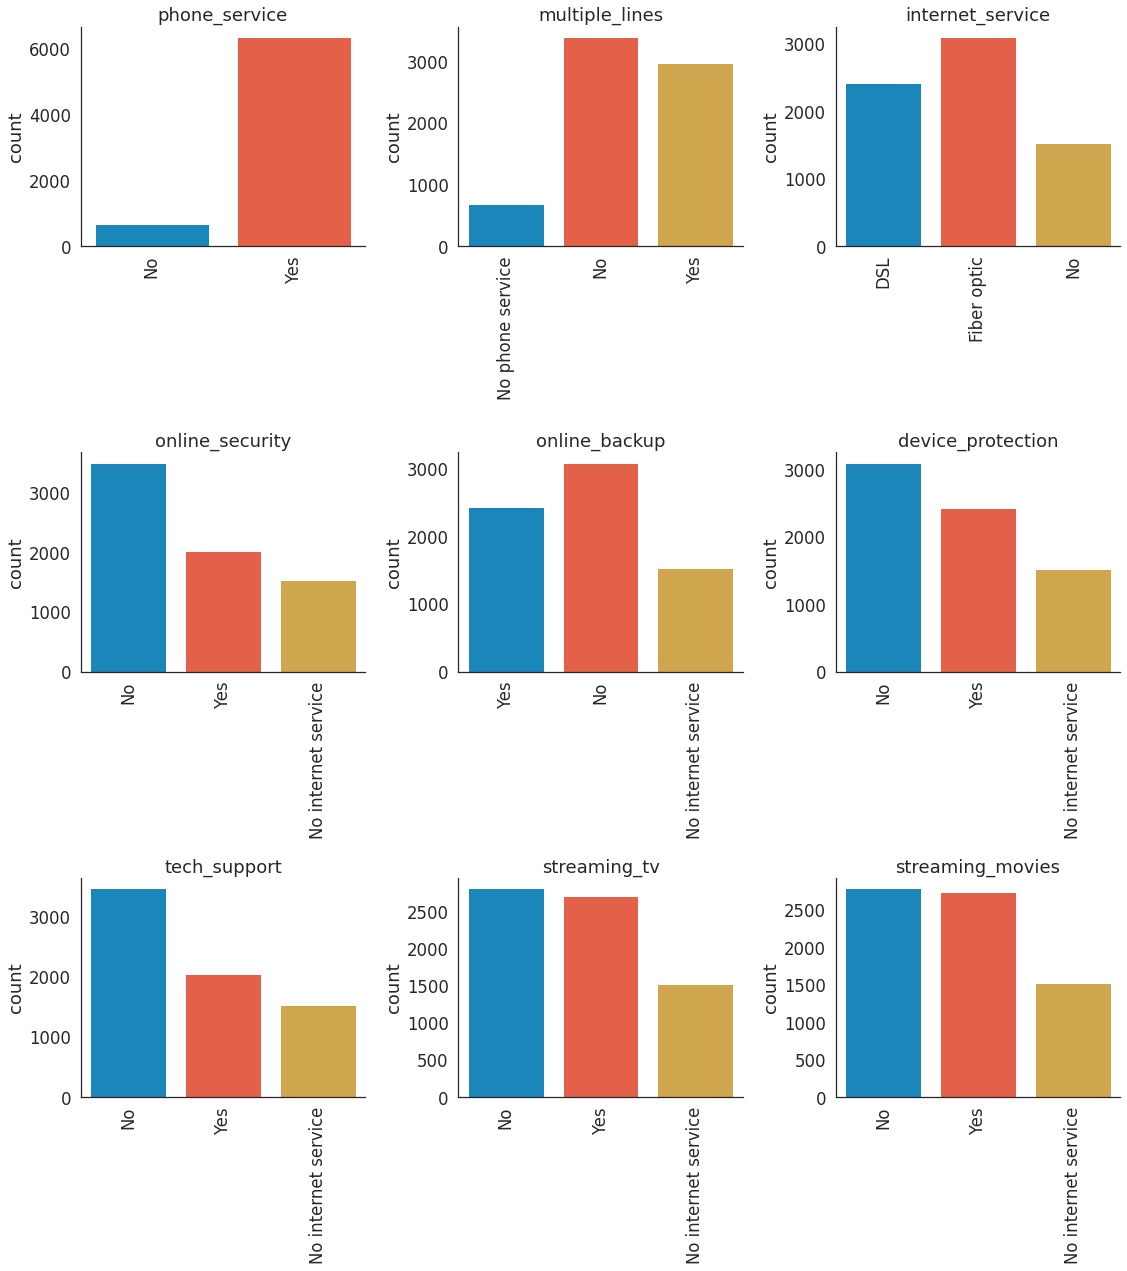

In [ ]:
column_service = ['phone_service', 'multiple_lines', 'internet_service', 
                  'online_security', 'online_backup', 'device_protection', 
                  'tech_support', 'streaming_tv', 'streaming_movies']

fig, ax = plt.subplots(3, 3, figsize=(16,18))
axes_list = [axes for axes_row in ax for axes in axes_row]

for i, col in enumerate(column_service):
  count_plot(data, col, axes_list[i])
  plt.setp(axes_list[i].get_xticklabels(), rotation=90)

plt.tight_layout()
plt.show()

#### Count by Churn

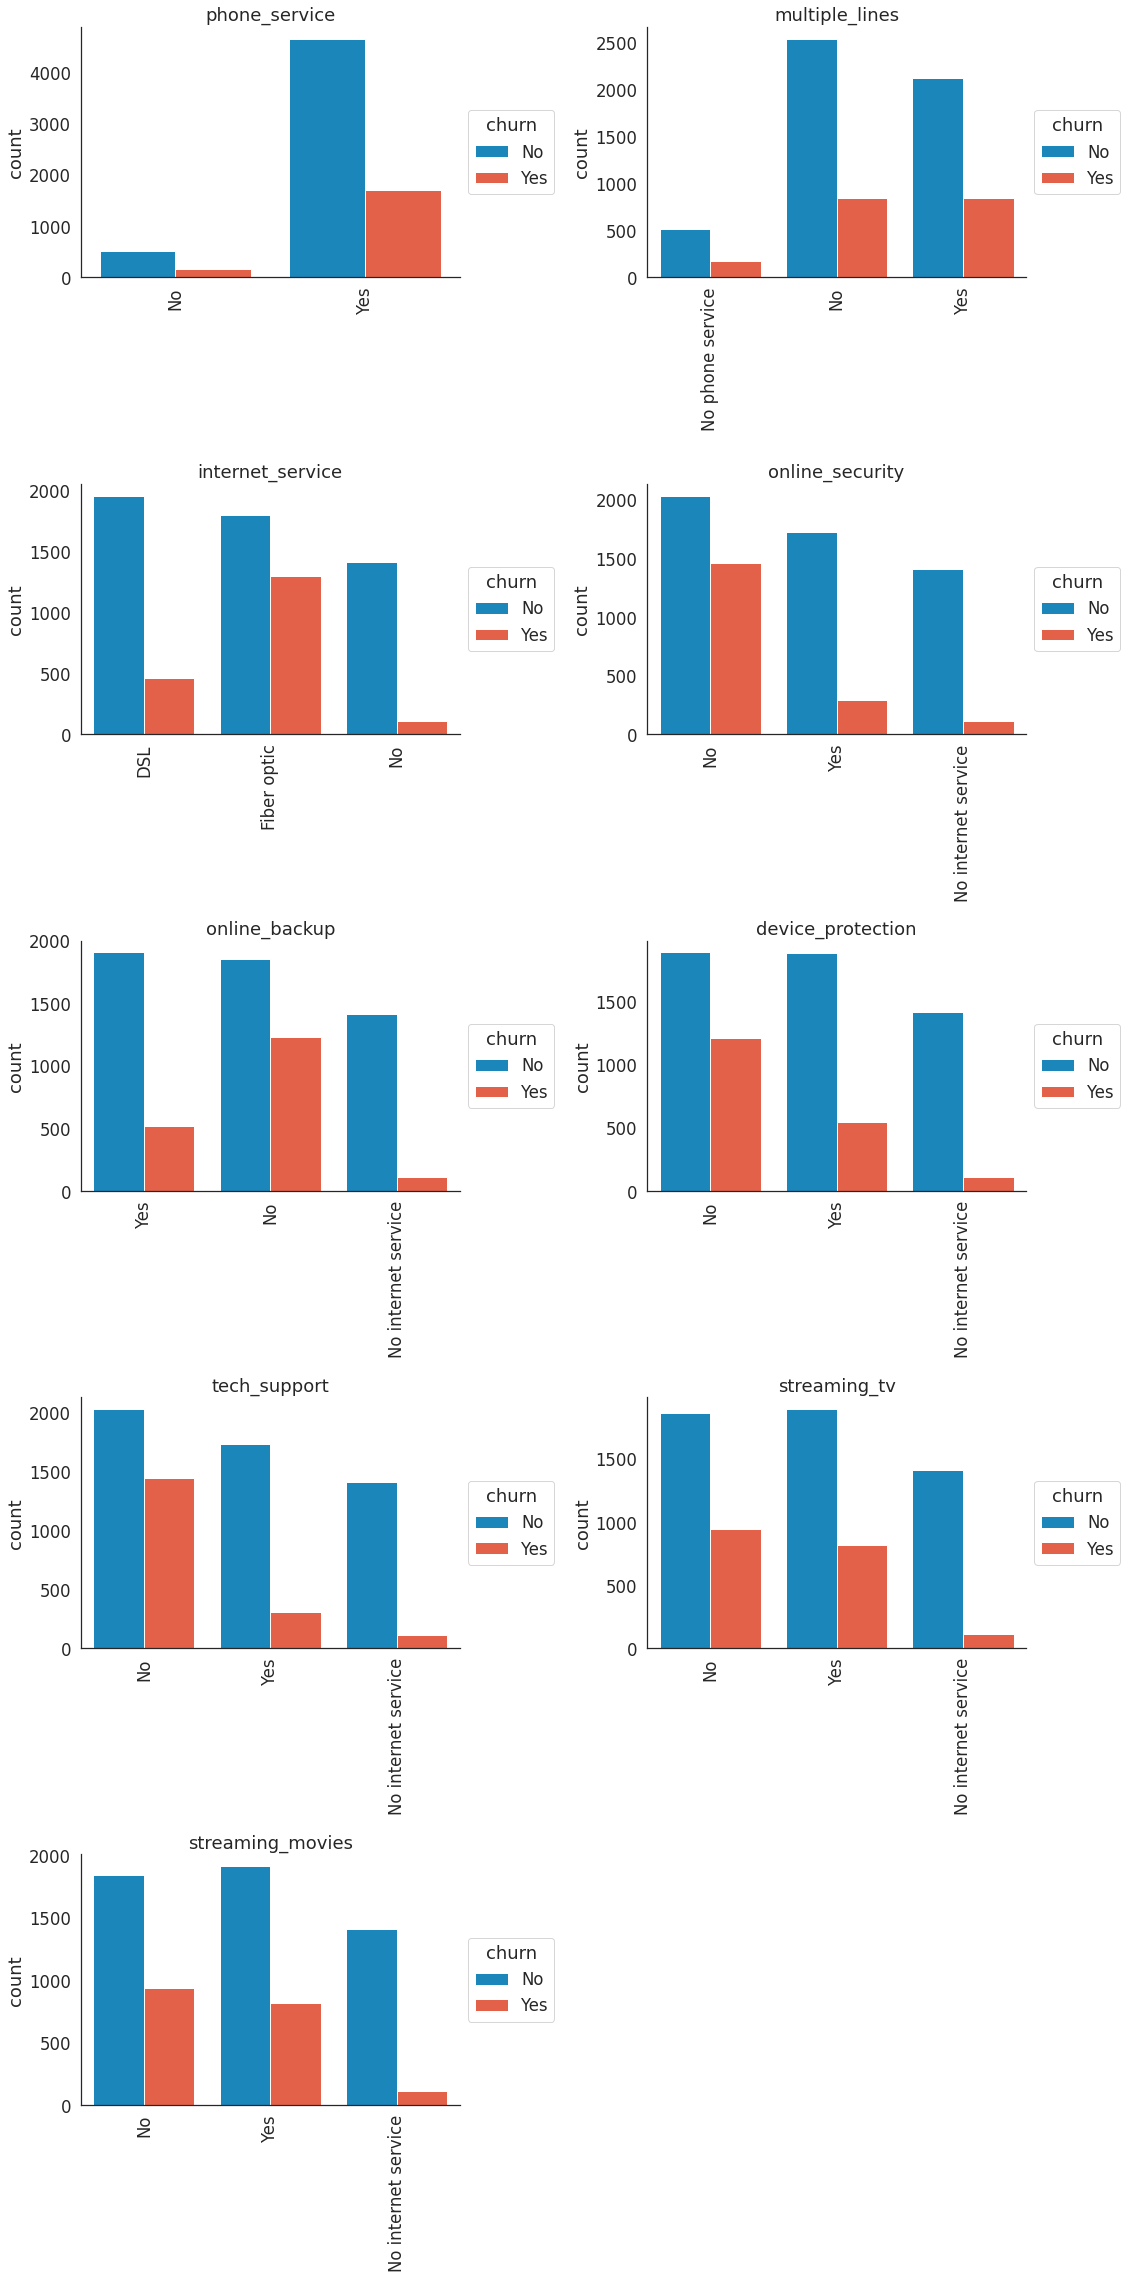

In [ ]:
column_service = ['phone_service', 'multiple_lines', 'internet_service', 
                  'online_security', 'online_backup', 'device_protection', 
                  'tech_support', 'streaming_tv', 'streaming_movies']

fig, ax = plt.subplots(5, 2, figsize=(16,32))
axes_list = [axes for axes_row in ax for axes in axes_row]

for i, col in enumerate(column_service):
  count_plot(data, col, axes_list[i], hue='churn')
  plt.setp(axes_list[i].get_xticklabels(), rotation=90)

axes_list[-1].set_visible(False)
plt.tight_layout()
plt.show()

#### Probability Mass Function

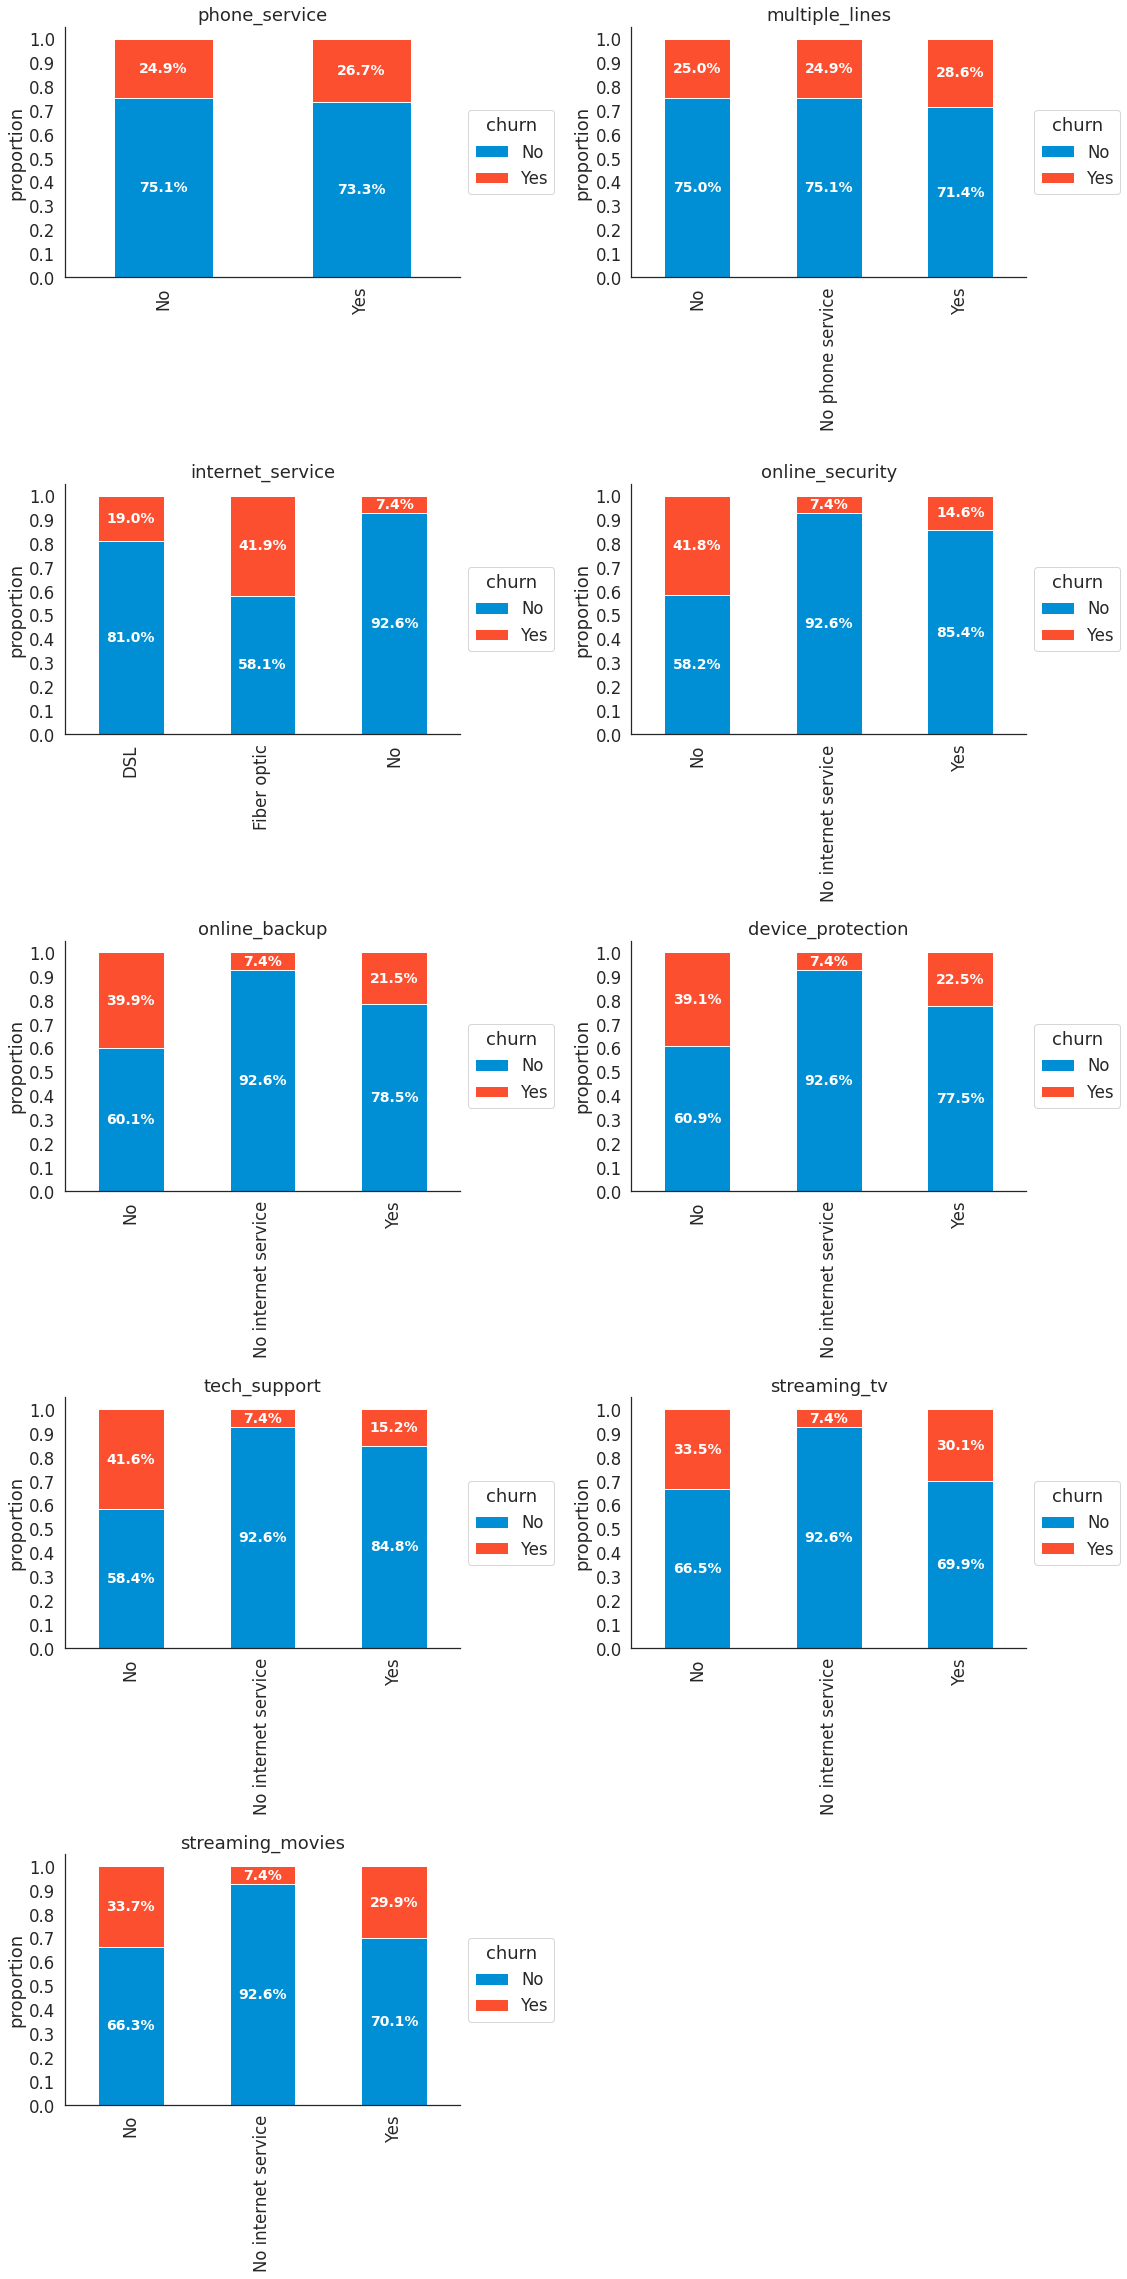

In [ ]:
column_service = ['phone_service', 'multiple_lines', 'internet_service', 
                  'online_security', 'online_backup', 'device_protection', 
                  'tech_support', 'streaming_tv', 'streaming_movies']

fig, ax = plt.subplots(5, 2, figsize=(16,32))
axes_list = [axes for axes_row in ax for axes in axes_row]

for i, col in enumerate(column_service):
  stacked_bar_plot(data, col, 'churn', axes_list[i])

axes_list[-1].set_visible(False)
plt.tight_layout()
plt.show()

## Numerical Data Distribution

### Histogram

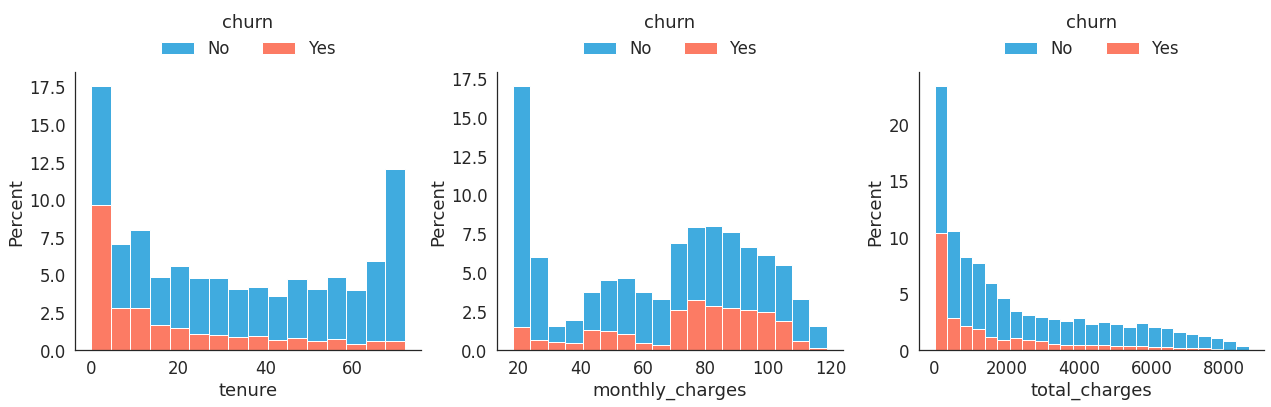

In [ ]:
column_numerical = ['tenure', 'monthly_charges', 'total_charges']

fig, ax = plt.subplots(1, 3, figsize=(18, 6))

for i, col in enumerate(column_numerical):
  sns.histplot(data=data, x=col, hue='churn', stat='percent', multiple='stack', ax=ax[i])
  sns.move_legend(ax[i], "lower center", bbox_to_anchor=(.5, 1), ncol=2, title='churn', frameon=False)
  sns.despine()

plt.tight_layout()
plt.show()

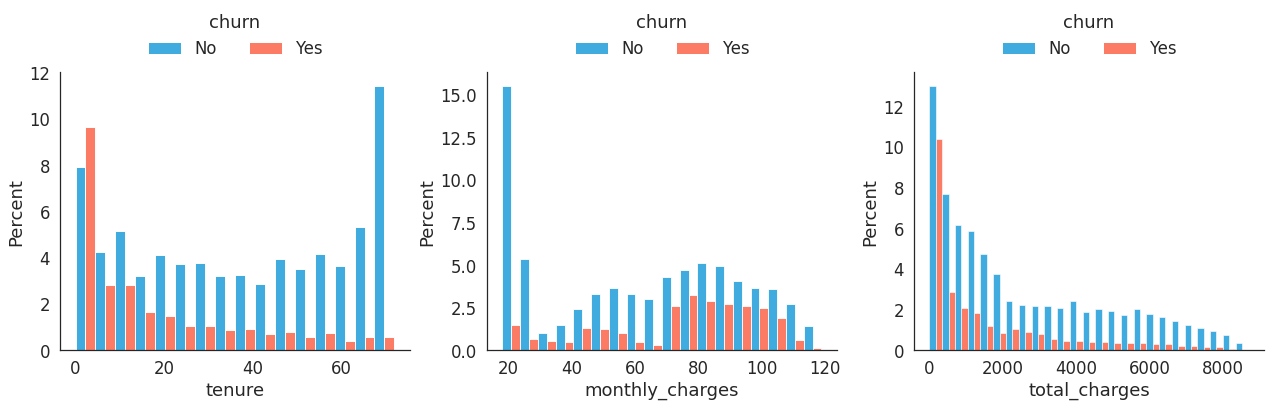

In [ ]:
numerical_column = ['tenure', 'monthly_charges', 'total_charges']

fig, ax = plt.subplots(1, 3, figsize=(18, 6))

for i, col in enumerate(numerical_column):
  sns.histplot(data=data, x=col, hue='churn', stat='percent', multiple='dodge', ax=ax[i])
  sns.move_legend(ax[i], "lower center", bbox_to_anchor=(.5, 1), ncol=2, title='churn', frameon=False)
  sns.despine()
  
plt.tight_layout()
plt.show()

### Box Plot

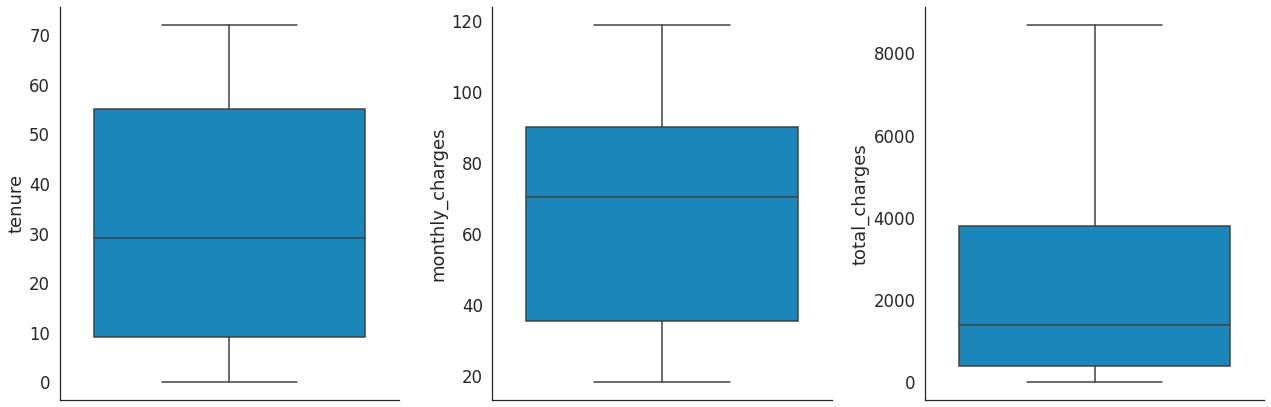

In [ ]:
column_numerical = ['tenure', 'monthly_charges', 'total_charges']

fig, ax = plt.subplots(1, 3, figsize=(18, 6))

for i, col in enumerate(column_numerical):
  sns.boxplot(data=data, y=col, ax=ax[i])
  sns.despine()

plt.tight_layout()
plt.show()

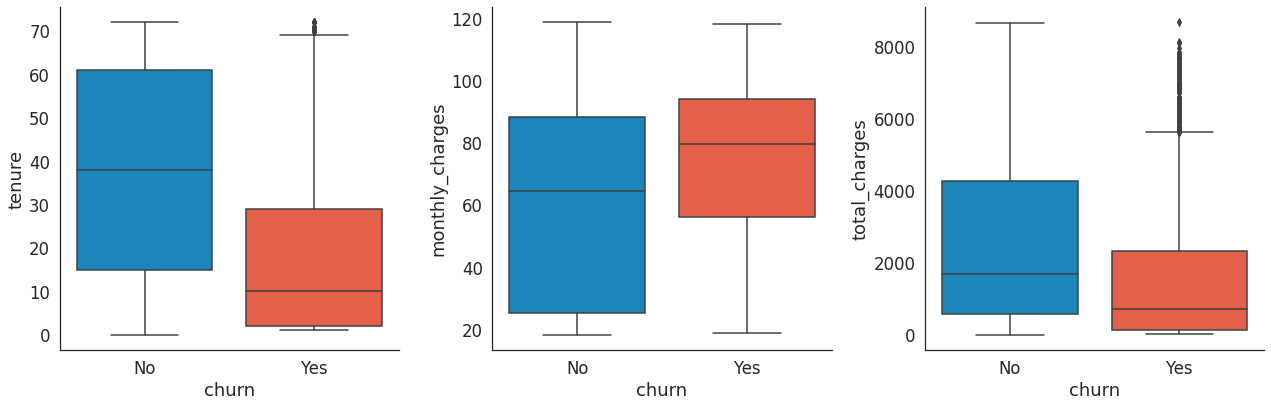

In [ ]:
numerical_column = ['tenure', 'monthly_charges', 'total_charges']

fig, ax = plt.subplots(1, 3, figsize=(18, 6))

for i, col in enumerate(numerical_column):
  sns.boxplot(data=data, x='churn', y=col, ax=ax[i])
  sns.despine()

plt.tight_layout()
plt.show()

### Violin Plot

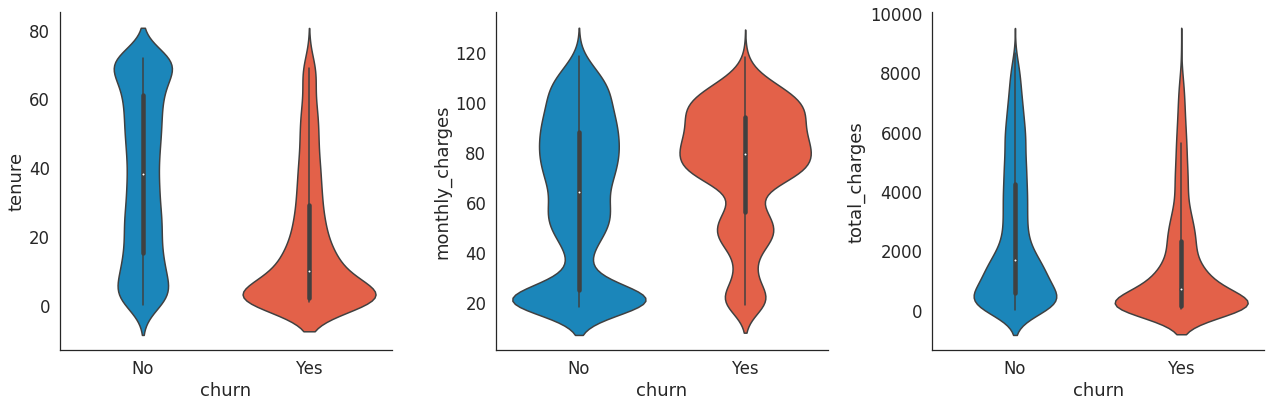

In [ ]:
column_numerical = ['tenure', 'monthly_charges', 'total_charges']

fig, ax = plt.subplots(1, 3, figsize=(18, 6))

for i, col in enumerate(column_numerical):
  sns.violinplot(data=data, x='churn', y=col, ax=ax[i])
  sns.despine()

plt.tight_layout()
plt.show()

### Heatmap Correlation

In [ ]:
column_numerical = ['tenure', 'monthly_charges', 'total_charges']

corr_matrix = data[column_numerical].corr().round(2)
corr_matrix.style.background_gradient(cmap='coolwarm', vmin=-1, vmax=1)

,tenure,monthly_charges,total_charges
tenure,1.000000,0.250000,0.830000
monthly_charges,0.250000,1.000000,0.650000
total_charges,0.830000,0.650000,1.000000


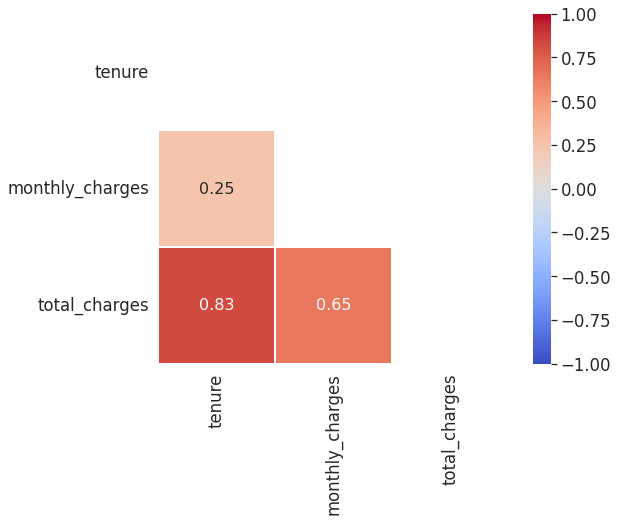

In [ ]:
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

fig, ax = plt.subplots(figsize=(8,6))

sns.heatmap(corr_matrix, center=0, vmin=-1, vmax=1, mask=mask,
            annot=True, square=True, linewidth=1, cmap='coolwarm',
            annot_kws={'fontsize':16}, ax=ax)

plt.show()

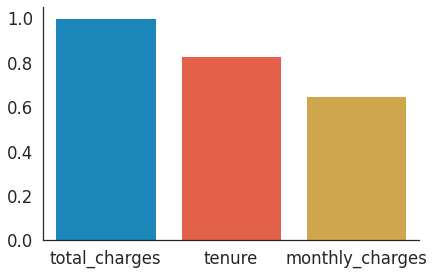

In [ ]:
test = corr_matrix['total_charges'].sort_values(ascending=False)

sns.barplot(x=test.index, y=test.values)
sns.despine()

# 6. Data Preprocessing
- Train-test split
- Feature Encoding
- Feature Scaling

In [ ]:
# numerical
column_numerical = ['tenure', 'monthly_charges', 'total_charges']

# categorical
column_categorical = list(data.columns)
column_categorical.remove('tenure')
column_categorical.remove('monthly_charges')
column_categorical.remove('total_charges')

# only contains input features
column_categorical.remove('churn')

## Train - Test Split

In [ ]:
data_X = data.drop('churn', axis=1)
data_y = data['churn']

X_train, X_test, y_train, y_test = train_test_split(data_X, data_y, test_size=0.3, random_state=1, stratify=data_y)

## Label Encoding
I use it for the target (label) variable.

In [ ]:
le = LabelEncoder()

le.fit(y_train)

y_train_encode = le.transform(y_train)
y_test_encode = le.transform(y_test)

In [ ]:
le.classes_

array(['No', 'Yes'], dtype=object)

From this output, we can say that retaining customers (`churn = No`) will be encoded as `0`, and churned customers (`churn = Yes`) will be encoded as `1`.

In [ ]:
print(y_train[:5].values)
print(y_train_encode[:5])

['No' 'Yes' 'No' 'Yes' 'No']
[0 1 0 1 0]


## One Hot Encoding
Since this dataset is mixture of numeric and categorical data, I will encode the categorical data then take it to the original data.

In [ ]:
# ohe = OneHotEncoder(sparse=False, drop='first')
ohe = OneHotEncoder(sparse=False)

ohe.fit(X_train[column_categorical])

# for col in column_categorical:
X_train_ohe = ohe.transform(X_train[column_categorical])
X_test_ohe = ohe.transform(X_test[column_categorical])

# ohe.categories_
X_train_ohe

array([[0., 1., 1., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 1., ..., 1., 0., 0.],
       ...,
       [1., 0., 1., ..., 0., 0., 0.],
       [1., 0., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 1., 0.]])

In [ ]:
column_ohe = ohe.get_feature_names_out()
print(column_ohe.shape)
print(column_ohe)

(43,)
['gender_Female' 'gender_Male' 'senior_citizen_0' 'senior_citizen_1'
 'partner_No' 'partner_Yes' 'dependents_No' 'dependents_Yes'
 'phone_service_No' 'phone_service_Yes' 'multiple_lines_No'
 'multiple_lines_No phone service' 'multiple_lines_Yes'
 'internet_service_DSL' 'internet_service_Fiber optic'
 'internet_service_No' 'online_security_No'
 'online_security_No internet service' 'online_security_Yes'
 'online_backup_No' 'online_backup_No internet service'
 'online_backup_Yes' 'device_protection_No'
 'device_protection_No internet service' 'device_protection_Yes'
 'tech_support_No' 'tech_support_No internet service' 'tech_support_Yes'
 'streaming_tv_No' 'streaming_tv_No internet service' 'streaming_tv_Yes'
 'streaming_movies_No' 'streaming_movies_No internet service'
 'streaming_movies_Yes' 'contract_Month-to-month' 'contract_One year'
 'contract_Two year' 'paperless_billing_No' 'paperless_billing_Yes'
 'payment_method_Bank transfer (automatic)'
 'payment_method_Credit card (aut

I will rename the column name to `snake_case` format.

In [ ]:
for i, col in enumerate(column_ohe):
  column_ohe[i] = inflection.underscore(column_ohe[i]).replace(' ', '_').replace('(automatic)','')

column_ohe

array(['gender_female', 'gender_male', 'senior_citizen_0',
       'senior_citizen_1', 'partner_no', 'partner_yes', 'dependents_no',
       'dependents_yes', 'phone_service_no', 'phone_service_yes',
       'multiple_lines_no', 'multiple_lines_no_phone_service',
       'multiple_lines_yes', 'internet_service_dsl',
       'internet_service_fiber_optic', 'internet_service_no',
       'online_security_no', 'online_security_no_internet_service',
       'online_security_yes', 'online_backup_no',
       'online_backup_no_internet_service', 'online_backup_yes',
       'device_protection_no', 'device_protection_no_internet_service',
       'device_protection_yes', 'tech_support_no',
       'tech_support_no_internet_service', 'tech_support_yes',
       'streaming_tv_no', 'streaming_tv_no_internet_service',
       'streaming_tv_yes', 'streaming_movies_no',
       'streaming_movies_no_internet_service', 'streaming_movies_yes',
       'contract_month_to_month', 'contract_one_year',
       'contract_

## Encoded Dataframe
I will combine the encoded features and the numerical features. Make sure that the index is the same.

### Train Set

In [ ]:
X_train.head()

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges
6427,Male,0,No,No,41,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.15,802.35
6971,Female,1,Yes,No,18,Yes,Yes,Fiber optic,No,No,No,Yes,Yes,Yes,Month-to-month,No,Bank transfer (automatic),99.75,1836.25
96,Male,0,Yes,Yes,71,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,One year,Yes,Credit card (automatic),66.85,4748.70
5640,Male,0,No,No,1,Yes,No,Fiber optic,No,No,No,No,No,Yes,Month-to-month,No,Electronic check,79.60,79.60
414,Female,1,Yes,No,48,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),70.65,3545.05


In [ ]:
# create dataframe from one-hot encoded features
X_train_ohe_df = pd.DataFrame(X_train_ohe, columns=column_ohe, index=X_train.index)

# combine the numerical and encoded features
X_train_encode = pd.concat([X_train.drop(columns=column_categorical), X_train_ohe_df], axis=1)
X_train_encode.head()

,tenure,monthly_charges,total_charges,gender_female,gender_male,senior_citizen_0,senior_citizen_1,partner_no,partner_yes,dependents_no,...,streaming_movies_yes,contract_month_to_month,contract_one_year,contract_two_year,paperless_billing_no,paperless_billing_yes,payment_method_bank_transfer_,payment_method_credit_card_,payment_method_electronic_check,payment_method_mailed_check
6427,41,20.15,802.35,0.0,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
6971,18,99.75,1836.25,1.0,0.0,0.0,1.0,0.0,1.0,1.0,...,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
96,71,66.85,4748.70,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
5640,1,79.60,79.60,0.0,1.0,1.0,0.0,1.0,0.0,1.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
414,48,70.65,3545.05,1.0,0.0,0.0,1.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


### Test Set

In [ ]:
X_test.head()

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges
1630,Male,1,Yes,No,38,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,102.60,4009.20
2008,Female,0,No,Yes,4,Yes,Yes,Fiber optic,No,No,Yes,Yes,No,No,Month-to-month,Yes,Mailed check,87.10,341.45
2685,Female,0,Yes,No,72,Yes,Yes,Fiber optic,Yes,Yes,Yes,No,Yes,No,Two year,No,Bank transfer (automatic),100.65,7334.05
903,Female,0,Yes,No,56,Yes,No,Fiber optic,Yes,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),105.60,6068.65
3905,Female,0,No,No,3,No,No phone service,DSL,No,No,No,No,Yes,No,Month-to-month,No,Credit card (automatic),35.20,108.95


In [ ]:
# create dataframe from one-hot encoded features
X_test_ohe_df = pd.DataFrame(X_test_ohe, columns=column_ohe, index=X_test.index)

# combine the numerical and encoded features
X_test_encode = pd.concat([X_test.drop(columns=column_categorical), X_test_ohe_df], axis=1)
X_test_encode.head()

,tenure,monthly_charges,total_charges,gender_female,gender_male,senior_citizen_0,senior_citizen_1,partner_no,partner_yes,dependents_no,...,streaming_movies_yes,contract_month_to_month,contract_one_year,contract_two_year,paperless_billing_no,paperless_billing_yes,payment_method_bank_transfer_,payment_method_credit_card_,payment_method_electronic_check,payment_method_mailed_check
1630,38,102.60,4009.20,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2008,4,87.10,341.45,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2685,72,100.65,7334.05,1.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
903,56,105.60,6068.65,1.0,0.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3905,3,35.20,108.95,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


## Feature Scaling
Since this dataset is not in normal distribution, I will use min-max scaling for the numerical features.

In [ ]:
column_numerical = ['tenure', 'monthly_charges', 'total_charges']

X_train_scale = X_train_encode.copy()
X_test_scale = X_test_encode.copy()

for i in column_numerical:
  scaler = MinMaxScaler()
  scaler.fit(X_train_scale[[i]])

  X_train_scale[[i]] = scaler.transform(X_train_scale[[i]])
  X_test_scale[[i]] = scaler.transform(X_test_scale[[i]])

## Scaled Dataframe
This dataframe has been encoded and scaled

In [ ]:
# combine the X-train and X-test
data_scale = pd.concat([X_train_scale, X_test_scale], axis=0)

# combine with the y-train
data_scale = data_scale.join(pd.Series(y_train_encode, name='churn', index=X_train_scale.index), lsuffix='_1', rsuffix='_2')

# combine with the y-test
data_scale = data_scale.join(pd.Series(y_test_encode, name='churn', index=X_test_scale.index), lsuffix='_1', rsuffix='_2')

# merging the y-train and y-test column
data_scale['churn_1'].fillna(data_scale['churn_2'], inplace=True)
data_scale.drop(columns='churn_2', inplace=True)
data_scale.rename(columns={'churn_1':'churn'}, inplace=True)

data_scale.head()

,tenure,monthly_charges,total_charges,gender_female,gender_male,senior_citizen_0,senior_citizen_1,partner_no,partner_yes,dependents_no,...,contract_month_to_month,contract_one_year,contract_two_year,paperless_billing_no,paperless_billing_yes,payment_method_bank_transfer_,payment_method_credit_card_,payment_method_electronic_check,payment_method_mailed_check,churn
6427,0.569444,0.017439,0.092386,0.0,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
6971,0.250000,0.810663,0.211433,1.0,0.0,0.0,1.0,0.0,1.0,1.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
96,0.986111,0.482810,0.546783,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
5640,0.013889,0.609865,0.009165,0.0,1.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
414,0.666667,0.520678,0.408190,1.0,0.0,0.0,1.0,0.0,1.0,1.0,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0


## Feature Correlations
Since the retaining customer (`churn = No`) is encoded as `0` and churned customer (`churn = Yes`) is encoded as `1`, we can say:

> If an attribute has a positive correlation with `churn`, it means that the attribute is likely to be a factor that drives customers to churn. And vice versa.

In [ ]:
corr_matrix = data_scale.corr().round(3)

corr_matrix.style.background_gradient(cmap='coolwarm', vmin=-1, vmax=1)

,tenure,monthly_charges,total_charges,gender_female,gender_male,senior_citizen_0,senior_citizen_1,partner_no,partner_yes,dependents_no,dependents_yes,phone_service_no,phone_service_yes,multiple_lines_no,multiple_lines_no_phone_service,multiple_lines_yes,internet_service_dsl,internet_service_fiber_optic,internet_service_no,online_security_no,online_security_no_internet_service,online_security_yes,online_backup_no,online_backup_no_internet_service,online_backup_yes,device_protection_no,device_protection_no_internet_service,device_protection_yes,tech_support_no,tech_support_no_internet_service,tech_support_yes,streaming_tv_no,streaming_tv_no_internet_service,streaming_tv_yes,streaming_movies_no,streaming_movies_no_internet_service,streaming_movies_yes,contract_month_to_month,contract_one_year,contract_two_year,paperless_billing_no,paperless_billing_yes,payment_method_bank_transfer_,payment_method_credit_card_,payment_method_electronic_check,payment_method_mailed_check,churn
tenure,1.000000,0.248000,0.826000,-0.005000,0.005000,-0.017000,0.017000,-0.380000,0.380000,-0.160000,0.160000,-0.008000,0.008000,-0.323000,-0.008000,0.332000,0.013000,0.020000,-0.039000,-0.264000,-0.039000,0.327000,-0.313000,-0.039000,0.360000,-0.313000,-0.039000,0.361000,-0.262000,-0.039000,0.324000,-0.245000,-0.039000,0.280000,-0.252000,-0.039000,0.286000,-0.646000,0.203000,0.559000,-0.006000,0.006000,0.244000,0.233000,-0.208000,-0.234000,-0.352000
monthly_charges,0.248000,1.000000,0.651000,0.015000,-0.015000,-0.220000,0.220000,-0.097000,0.097000,0.114000,-0.114000,-0.247000,0.247000,-0.338000,-0.247000,0.490000,-0.160000,0.787000,-0.764000,0.361000,-0.764000,0.297000,0.211000,-0.764000,0.442000,0.172000,-0.764000,0.483000,0.322000,-0.764000,0.338000,0.017000,-0.764000,0.630000,0.018000,-0.764000,0.627000,0.060000,0.005000,-0.075000,-0.352000,0.352000,0.043000,0.031000,0.272000,-0.377000,0.193000
total_charges,0.826000,0.651000,1.000000,0.000000,-0.000000,-0.103000,0.103000,-0.318000,0.318000,-0.062000,0.062000,-0.113000,0.113000,-0.396000,-0.113000,0.469000,-0.052000,0.362000,-0.375000,-0.063000,-0.375000,0.412000,-0.176000,-0.375000,0.509000,-0.188000,-0.375000,0.522000,-0.083000,-0.375000,0.432000,-0.196000,-0.375000,0.515000,-0.202000,-0.375000,0.520000,-0.444000,0.171000,0.354000,-0.159000,0.159000,0.186000,0.183000,-0.059000,-0.296000,-0.198000
gender_female,-0.005000,0.015000,0.000000,1.000000,-1.000000,-0.002000,0.002000,-0.002000,0.002000,0.011000,-0.011000,-0.006000,0.006000,-0.004000,-0.006000,0.008000,-0.007000,0.011000,-0.006000,-0.010000,-0.006000,0.017000,-0.008000,-0.006000,0.014000,0.003000,-0.006000,0.002000,-0.003000,-0.006000,0.009000,-0.003000,-0.006000,0.008000,-0.005000,-0.006000,0.010000,0.003000,-0.008000,0.004000,-0.012000,0.012000,0.016000,-0.001000,-0.001000,-0.014000,0.009000
gender_male,0.005000,-0.015000,-0.000000,-1.000000,1.000000,0.002000,-0.002000,0.002000,-0.002000,-0.011000,0.011000,0.006000,-0.006000,0.004000,0.006000,-0.008000,0.007000,-0.011000,0.006000,0.010000,0.006000,-0.017000,0.008000,0.006000,-0.014000,-0.003000,0.006000,-0.002000,0.003000,0.006000,-0.009000,0.003000,0.006000,-0.008000,0.005000,0.006000,-0.010000,-0.003000,0.008000,-0.004000,0.012000,-0.012000,-0.016000,0.001000,0.001000,0.014000,-0.009000
senior_citizen_0,-0.017000,-0.220000,-0.103000,-0.002000,0.002000,1.000000,-1.000000,0.016000,-0.016000,-0.211000,0.211000,0.009000,-0.009000,0.136000,0.009000,-0.143000,0.108000,-0.255000,0.183000,-0.186000,0.183000,0.039000,-0.088000,0.183000,-0.067000,-0.095000,0.183000,-0.059000,-0.206000,0.183000,0.061000,-0.049000,0.183000,-0.105000,-0.034000,0.183000,-0.120000,-0.138000,0.046000,0.117000,0.157000,-0.157000,0.016000,0.024000,-0.172000,0.153000,-0.151000
senior_citizen_1,0.017000,0.220000,0.103000,0.002000,-0.002000,-1.000000,1.000000,-0.016000,0.016000,0.211000,-0.211000,-0.009000,0.009000,-0.136000,-0.009000,0.143000,-0.108000,0.255000,-0.183000,0.186000,-0.183000,-0.039000,0.088000,-0.183000,0.067000,0.

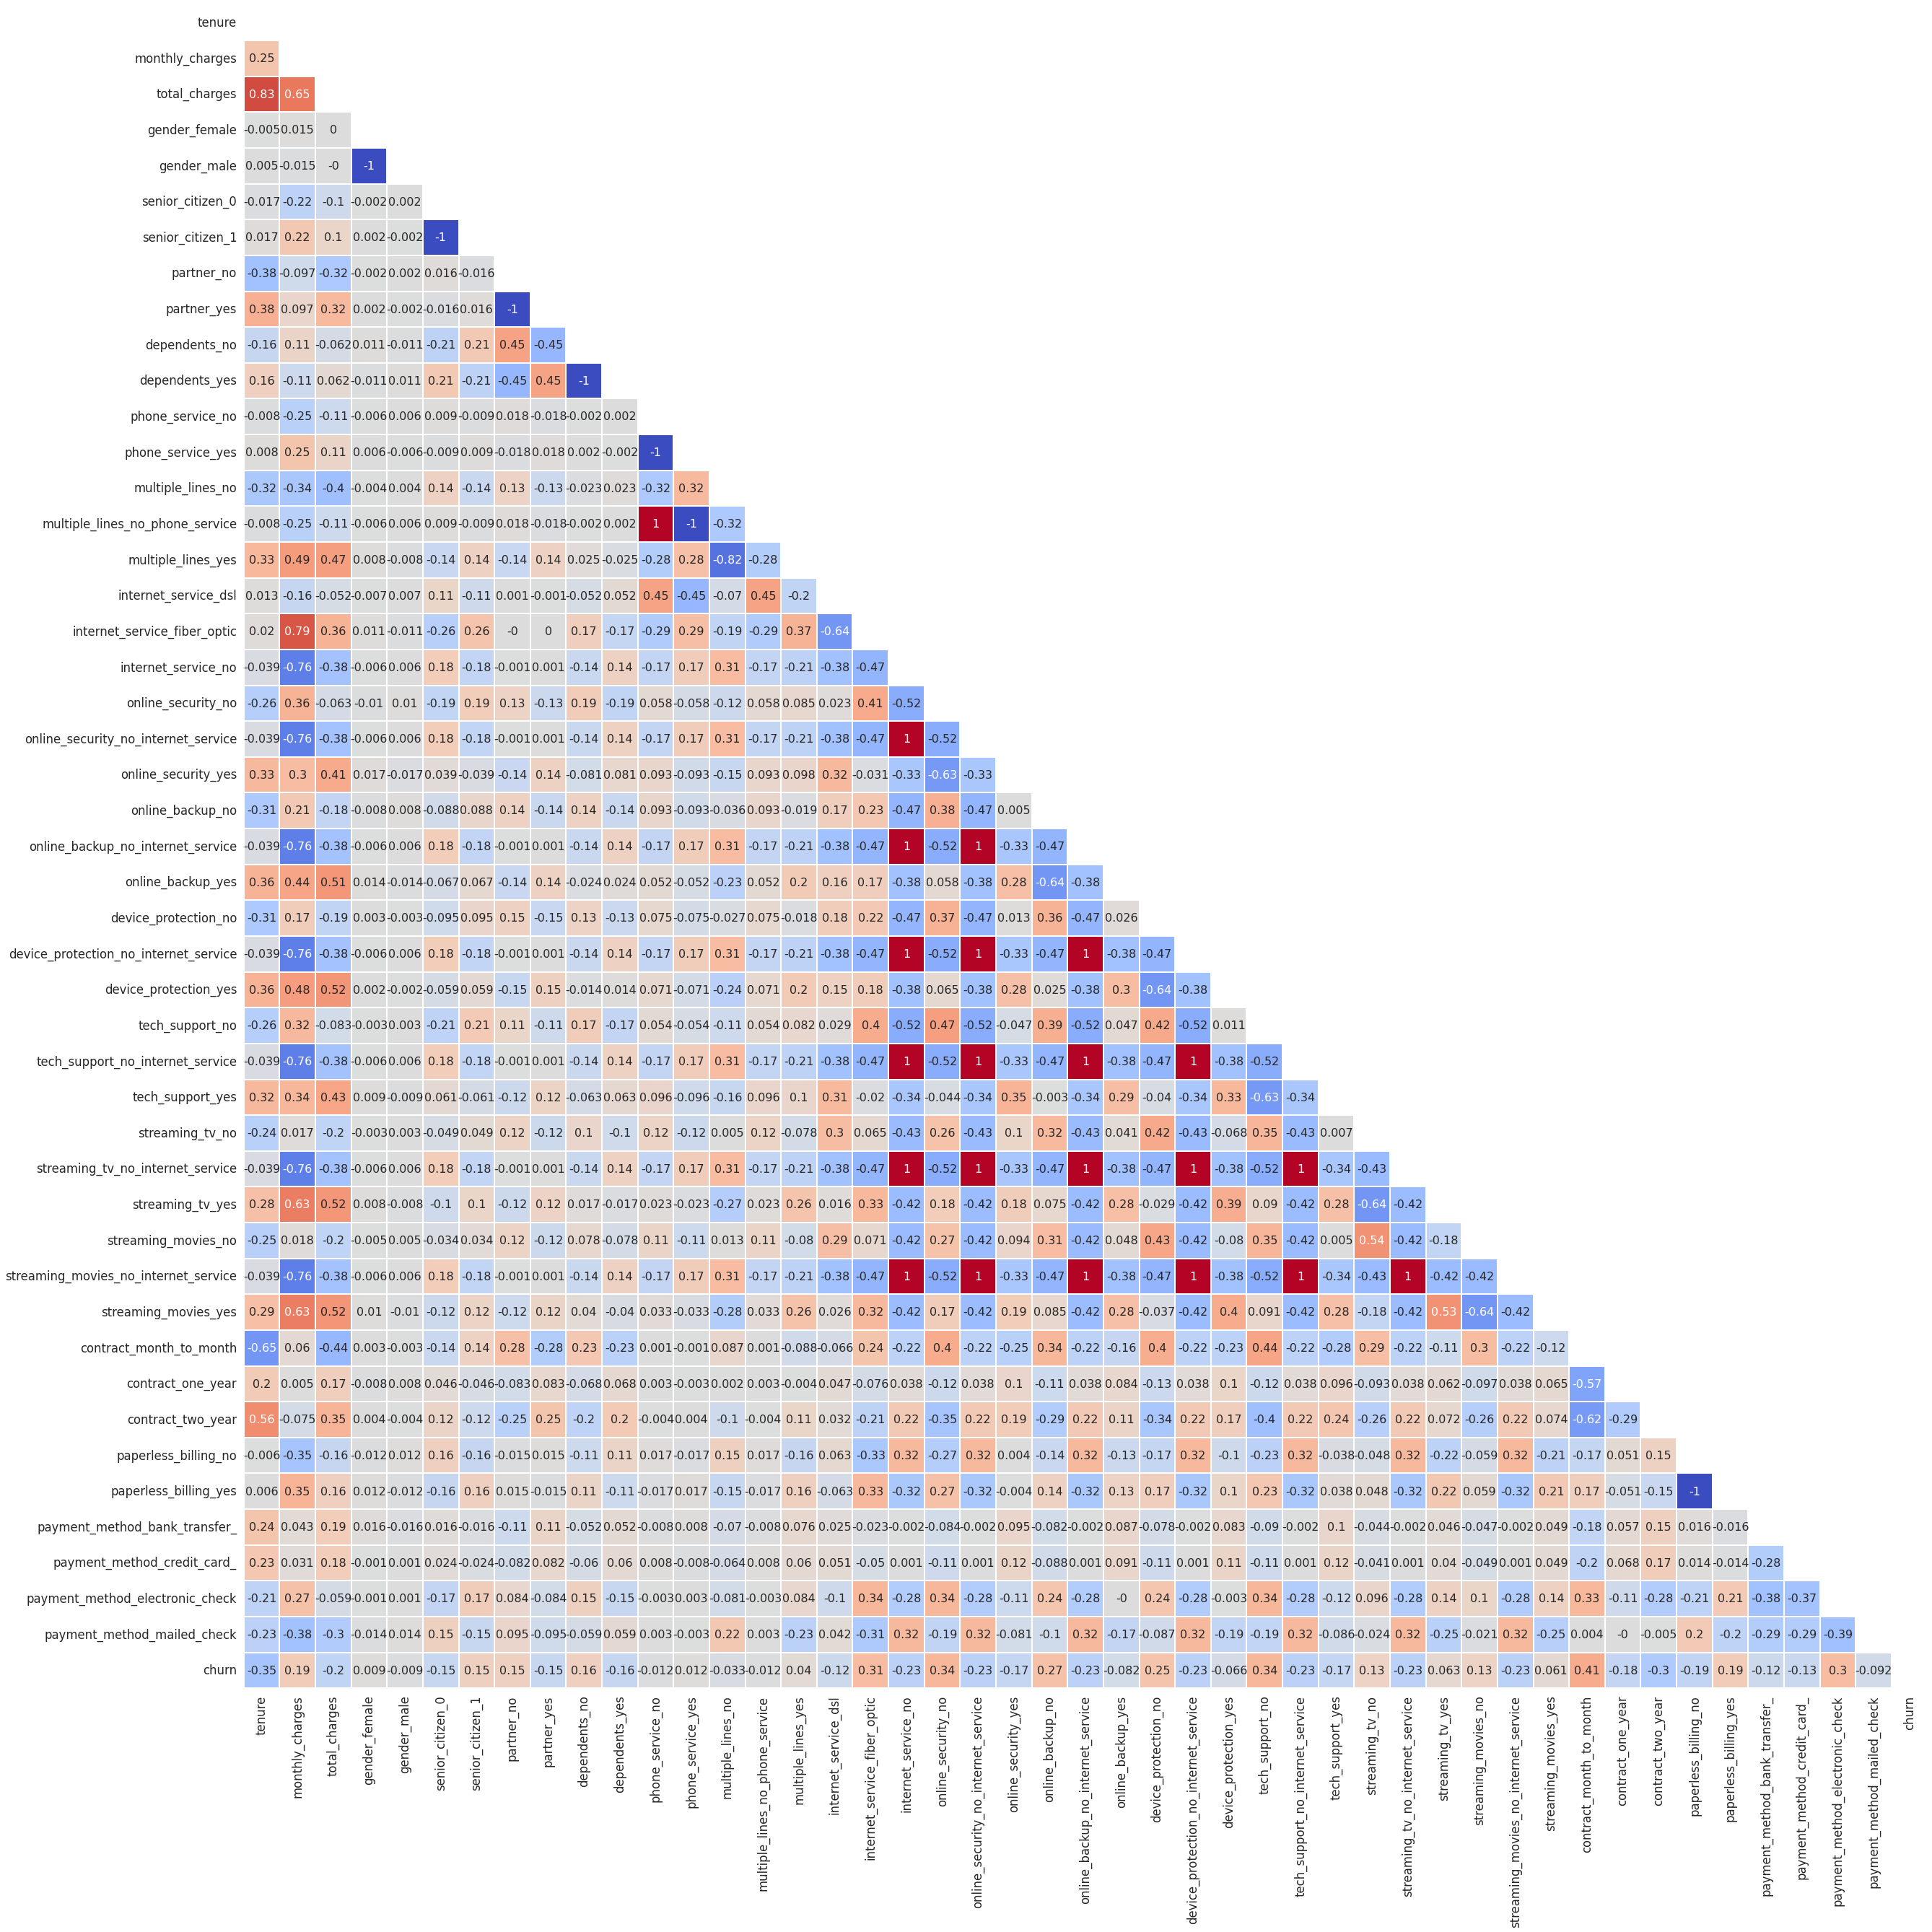

In [ ]:
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

fig, ax = plt.subplots(figsize=(40,40))
sns.heatmap(corr_matrix, vmin=-1, vmax=1, cbar=False,
            cmap='coolwarm', linewidth=1, mask=mask, 
            square=True, annot=True, annot_kws={'fontsize':16}, ax=ax)

plt.show()

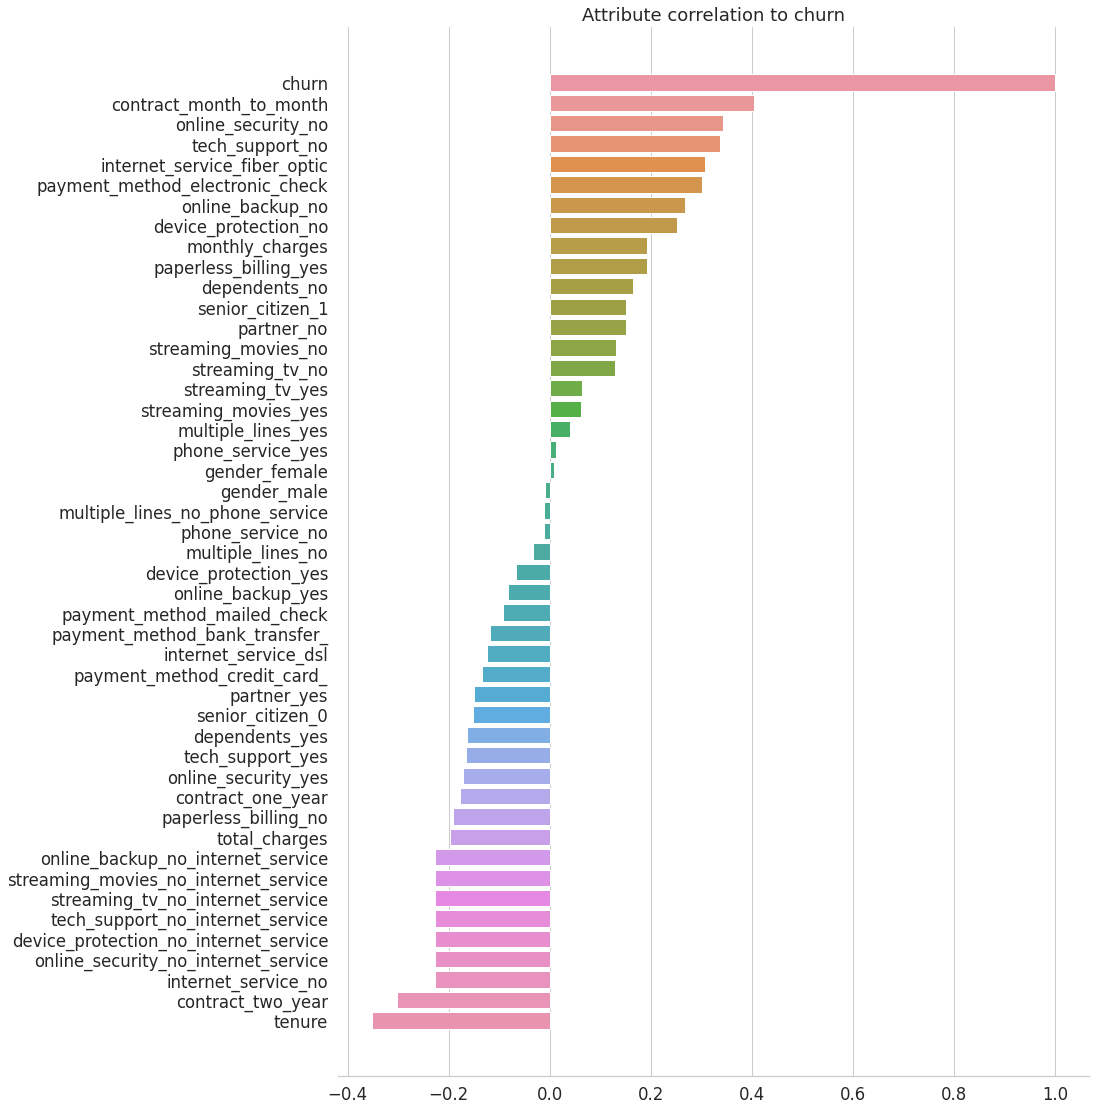

In [ ]:
corr_matrix = data_scale.corr().round(3)
corr_target = corr_matrix['churn'].sort_values(ascending=False)

with sns.axes_style('whitegrid'):
  fig, ax = plt.subplots(figsize=(12,18))

  sns.barplot(x=corr_target.values, y=corr_target.index, ax=ax)

  ax.grid(False, axis='y')
  ax.set_title('Attribute correlation to churn')

  ax.axis('tight')
  sns.despine(left=True)
  plt.show()

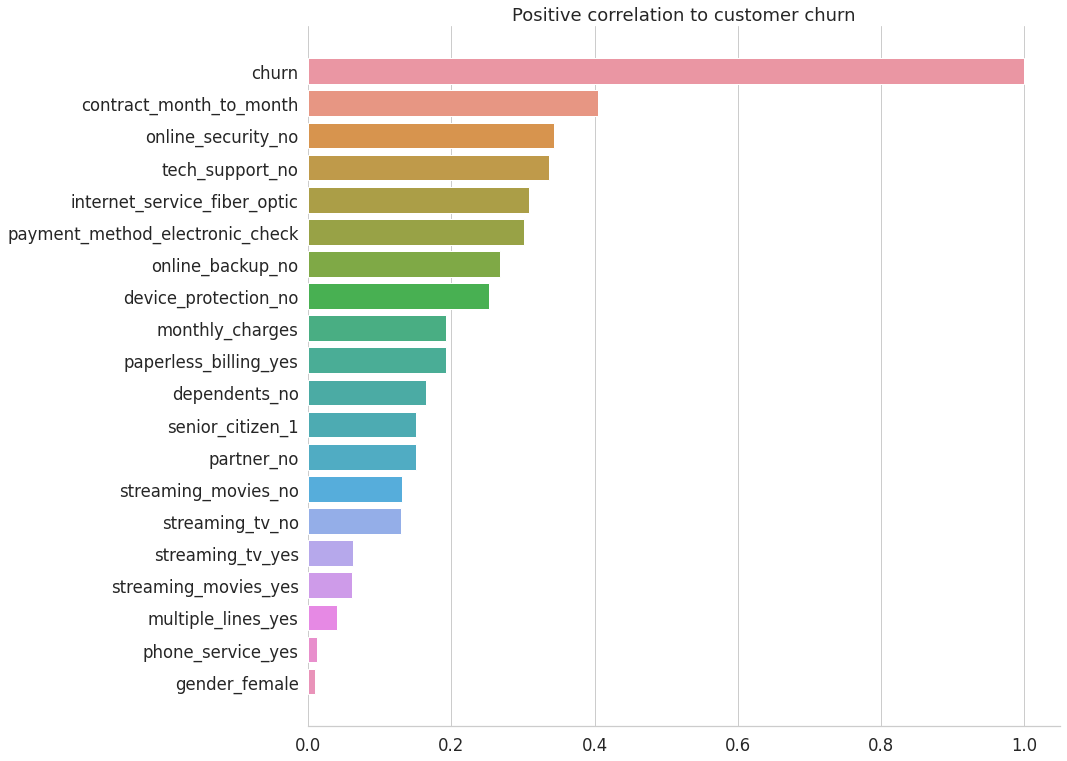

In [ ]:
corr_positive = corr_target[corr_target >= 0]

with sns.axes_style('whitegrid'):
  fig, ax = plt.subplots(figsize=(12,12))

  sns.barplot(x=corr_positive.values, y=corr_positive.index, ax=ax)

  ax.grid(False, axis='y')
  ax.set_title('Positive correlation to customer churn')

  ax.axis('tight')
  sns.despine(left=True)
  plt.show()

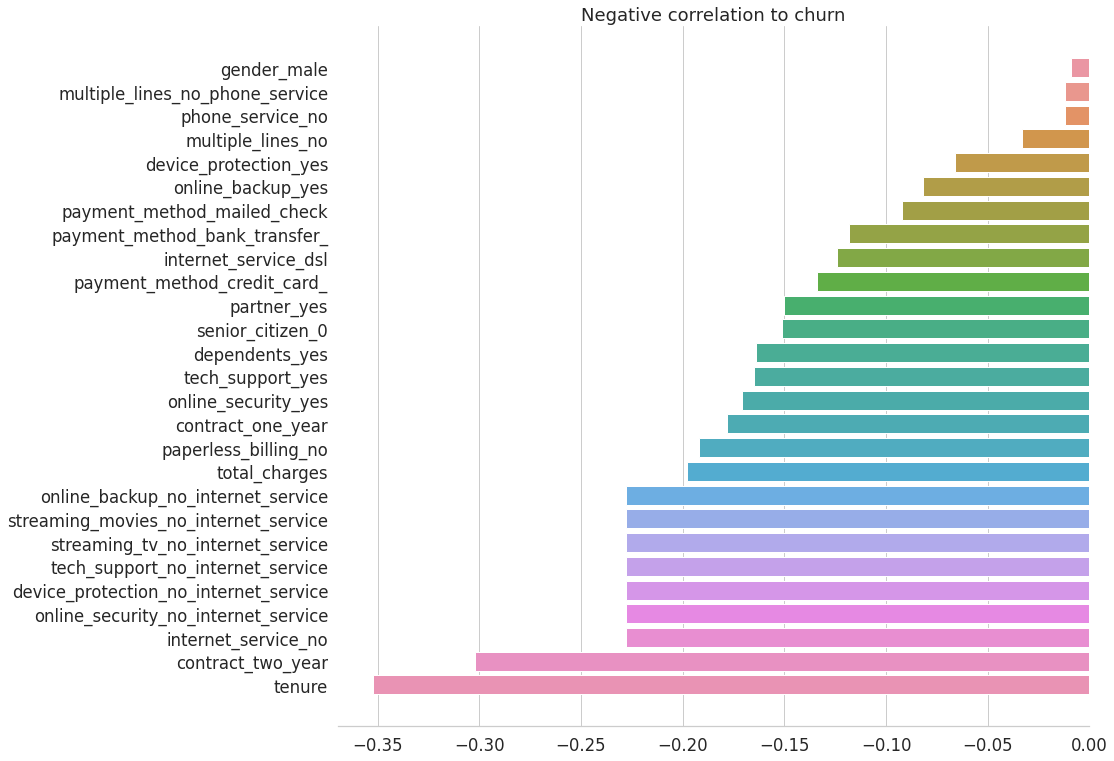

In [ ]:
corr_negative = corr_target[corr_target < 0]

with sns.axes_style('whitegrid'):
  fig, ax = plt.subplots(figsize=(12,12))

  sns.barplot(x=corr_negative.values, y=corr_negative.index, ax=ax)

  ax.grid(False, axis='y')
  ax.set_title('Negative correlation to churn')

  ax.axis('tight')
  sns.despine(left=True)
  plt.show()

From these correlation plots, we can see that there are some perfect multicollinearities. Multicollinearity is a condition where some independent variables are highly correlated to each other. A perfect correlation is a condition when two independent variables have a +1.0 or -1.0 correlation. The perfect correlation between independent variables can lead to a singularity.
<br><br>
The simplest way to solve this problem is dropping 1 column when doing one-hot encoding.
<br><br>
Jessica Miles had written some good explanations about multicollinearity and the effect of dropping a column (first column or average column) from the encoded data. You can read [here](https://towardsdatascience.com/drop-first-can-hurt-your-ols-regression-models-interpretability-4ca529cfb707).

# References
- Analytics Vidhya, Churn Prediction- Commercial use of Data Science. [link](https://www.analyticsvidhya.com/blog/2021/08/churn-prediction-commercial-use-of-data-science/)
- Avaus, Predicting Customer Churn. [link](https://www.avaus.com/blog/predicting-customer-churn)
- Kaggle, Telco Customer Churn Dataset. [link](https://www.kaggle.com/blastchar/telco-customer-churn)
- IBM, Telco Customer Churn. [link](https://community.ibm.com/community/user/businessanalytics/blogs/steven-macko/2019/07/11/telco-customer-churn-1113)
- Hardvard Business Review, The Value of Keeping the Right Customers. [link](https://hbr.org/2014/10/the-value-of-keeping-the-right-customers)
- OutboundEngine, Customer Retention Marketing vs. Customer Acquisition Marketing. [link](https://www.outboundengine.com/blog/customer-retention-marketing-vs-customer-acquisition-marketing/)